<a href="https://colab.research.google.com/github/aunghlaingtun/NYP_ITI_105_MLPrj/blob/main/Copy_of_Linear_Model_Data_Preposs_ID_6319250G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ITI-105 Machine Learning Project: HDB Resale Price Prediction
## Linear Model Development with Comprehensive Analysis & MLflow Tracking

**Student Information:**
- **Name:** Aung Hlaing Tun
- **Student ID:** 6319250G
- **Project Group ID:** AlgroRiddler
- **Date:** [ 29 Aug 2025]

**Project Overview:**
This notebook implements a comprehensive machine learning pipeline for HDB resale price prediction, featuring:
- ✅ Professional data preprocessing and feature engineering
- ✅ Comprehensive correlation analysis
- ✅ Multi-method outlier detection (IQR, Z-Score, Isolation Forest, Domain-specific)
- ✅ Linear regression models with hyperparameter tuning
- ✅ Complete MLflow experiment tracking (no warnings)
- ✅ Professional visualizations and analysis

## 1. Environment Setup & Dependencies

In [ ]:
# Colab/Jupyter
!pip uninstall -y mlflow
!pip install "mlflow<3" dagshub
# Restart the kernel if your environment doesn’t auto-reload:
import os; os._exit(0)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.3/261.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 703.4/703.4 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Install required packages
!pip install mlflow pyngrok geopy scikit-learn -q

print("✅ All packages installed successfully!")

✅ All packages installed successfully!


In [ ]:
import mlflow
print("MLflow version:", mlflow.__version__)  # should show 2.x.x


MLflow version: 2.22.1


###  1.Connect to your DagsHub repo (set token + tracking URI)

In [ ]:
import os, mlflow, dagshub
from google.colab import userdata # Import userdata to access Colab secrets

# ==== FILL THESE ====
USER = "aunghlaingtun"        # your DagsHub username (or org)
REPO = "NYP_ITI_105"          # your repo

TOKEN = userdata.get('dagshub') # Get token from Colab secrets

# Auth (do NOT hard-code token in public notebooks—use env/secrets in real life)
os.environ["MLFLOW_TRACKING_USERNAME"] = USER
os.environ["MLFLOW_TRACKING_PASSWORD"] = TOKEN

# Point MLflow to your repo (dagshub.init also sets the tracking URI)
dagshub.init(repo_owner=USER, repo_name=REPO, mlflow=True)

# Create/use a consistent experiment name (you can make Step1/Step2/Step3 too)
mlflow.set_experiment("HDB_Linear_Workflow")

print("Tracking URI ->", mlflow.get_tracking_uri())
print("Open experiments:", f"https://dagshub.com/{USER}/{REPO}.mlflow/#/experiments")

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=291d3113-6d97-468b-a1f0-107f3e536691&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=79aea3645cd76ba85af99e9ed7e2272f15b31513dd6ad6a9b0cd8474ed870fa4




Accessing as aunghlaingtun

Initialized MLflow to track repo "aunghlaingtun/NYP_ITI_105"

Repository aunghlaingtun/NYP_ITI_105 initialized!

2025/08/27 16:18:08 INFO mlflow.tracking.fluent: Experiment with name 'HDB_Linear_Workflow' does not exist. Creating a new experiment.


Tracking URI -> https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow
Open experiments: https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow/#/experiments


In [ ]:
with mlflow.start_run(run_name="smoke_test"):
    mlflow.log_params({"model":"LinearRegression", "data_version":"HDB_2015_2025_v1"})
    mlflow.log_metrics({"r2":0.9691, "rmse":31419, "mae":20856, "mape":4.52})

print("Now open:", f"https://dagshub.com/{USER}/{REPO}.mlflow/#/experiments")


🏃 View run smoke_test at: https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow/#/experiments/0/runs/a914268b35204ebeaffff1c0453a7183
🧪 View experiment at: https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow/#/experiments/0
Now open: https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow/#/experiments


## 2. Google Drive & Ngrok Configuration

## 3. Import Libraries & Setup

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from datetime import datetime
import time
import re
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
sns.set_palette("husl")

# Geospatial analysis
from geopy.distance import geodesic

# Machine Learning
import sklearn # Import sklearn directly to access __version__
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import IsolationForest
from scipy import stats

# MLflow for experiment tracking
import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

print("✅ All libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🤖 Scikit-learn version: {sklearn.__version__}")
print(f"📈 MLflow version: {mlflow.__version__}")

✅ All libraries imported successfully!
📊 Pandas version: 2.2.2
🤖 Scikit-learn version: 1.6.1
📈 MLflow version: 2.22.1


## 4. MLflow Setup & Configuration

In [ ]:
# import subprocess # subprocess is not needed if not running local UI
# import time # time is not needed if not running local UI
# from pyngrok import ngrok # ngrok is not needed for DagsHub UI

def setup_comprehensive_mlflow():
    """Setup comprehensive MLflow tracking with proper experiment organization"""
    print("🚀 COMPREHENSIVE MLFLOW SETUP")
    print("=" * 60)

    # Set tracking URI for DagsHub persistence (already set by dagshub.init)
    # tracking_uri = "file:///content/drive/MyDrive/26AUGRunlog2" # Remove local file tracking
    # os.makedirs("/content/drive/MyDrive/26AUGRunlog2", exist_ok=True) # Remove local directory creation
    # mlflow.set_tracking_uri(tracking_uri) # Remove explicit setting if dagshub.init is used
    print(f"✓ MLflow tracking URI: {mlflow.get_tracking_uri()}") # Get URI from dagshub.init

    # Create main experiment
    experiment_name = "HDB_Comprehensive_Analysis_Professional"

    try:
        experiment = mlflow.get_experiment_by_name(experiment_name)
        if experiment is None:
            # artifact_location is not needed when tracking to DagsHub
            experiment_id = mlflow.create_experiment(experiment_name)
            print(f"✓ Created new experiment: {experiment_name}")
        else:
            experiment_id = experiment.experiment_id
            print(f"✓ Using existing experiment: {experiment_name}")

        mlflow.set_experiment(experiment_name)
        return experiment_id

    except Exception as e:
        print(f"❌ Error setting up MLflow: {e}")
        return None

# def start_mlflow_ui(): # Remove ngrok UI function
#     """Start MLflow UI with ngrok tunnel"""
#     print("\n🌐 STARTING MLFLOW UI")
#     print("=" * 40)

#     # Kill existing ngrok processes
#     try:
#         ngrok.kill()
#         print("✓ Killed existing ngrok processes")
#     except:
#         pass

#     # Start MLflow UI in background
#     mlflow_process = subprocess.Popen(
#         ["mlflow", "ui", "--backend-store-uri", "file:///content/drive/MyDrive/26AUGRunlog2",
#          "--port", "5000", "--host", "0.0.0.0"],
#         stdout=subprocess.PIPE,
#         stderr=subprocess.PIPE
#     )

#     # Wait for MLflow to start
#     time.sleep(5)

#     # Create ngrok tunnel
#     try:
#         public_url = ngrok.connect(5000)
#         print(f"🚀 MLflow UI is live at: {public_url}")
#         print("📊 Access your experiment tracking dashboard!")
#         return str(public_url)
#     except Exception as e:
#         print(f"❌ Failed to create ngrok tunnel: {e}")
#         return None

# Setup MLflow
experiment_id = setup_comprehensive_mlflow()
# mlflow_url = start_mlflow_ui() # Remove ngrok UI start

if experiment_id:
    print(f"\n✅ MLflow setup complete!")
    print(f"📊 Experiment ID: {experiment_id}")
    # if mlflow_url: # Remove ngrok UI URL print
        # print(f"🌐 MLflow UI: {mlflow_url}")

print(f"🌐 Access MLflow UI on DagsHub: https://dagshub.com/{USER}/{REPO}.mlflow")

🚀 COMPREHENSIVE MLFLOW SETUP
✓ MLflow tracking URI: https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow
✓ Using existing experiment: HDB_Comprehensive_Analysis_Professional

✅ MLflow setup complete!
📊 Experiment ID: 1
🌐 Access MLflow UI on DagsHub: https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow


## 5. Data Loading & Upload

In [ ]:
# Upload my data of 4 CSV files
print("📁 Please upload  4 CSV files:")
print("1. base_hdb_resale_prices_2015Jan-2025Jun.csv")
print("2. clean_hdb_coordinates.csv")
print("3. CPI_2015Jan-2025Jun.csv")
print("4. clean_mrt_lrt_coordinates_2025Jan.csv")

uploaded = files.upload()

print(f"\n✅ Uploaded {len(uploaded)} files successfully!")
for filename in uploaded.keys():
    print(f"   📄 {filename}")

📁 Please upload  4 CSV files:
1. base_hdb_resale_prices_2015Jan-2025Jun.csv
2. clean_hdb_coordinates.csv
3. CPI_2015Jan-2025Jun.csv
4. clean_mrt_lrt_coordinates_2025Jan.csv


Saving clean_mrt_lrt_coordinates_2025Jan.csv to clean_mrt_lrt_coordinates_2025Jan.csv

✅ Uploaded 1 files successfully!
   📄 clean_mrt_lrt_coordinates_2025Jan.csv


In [ ]:
def load_datasets_professional():
    """Load all 4 CSV datasets with comprehensive validation"""
    print("\n📊 LOADING HDB DATASETS")
    print("=" * 50)

    # Define expected files
    expected_files = {
        'hdb_prices': 'base_hdb_resale_prices_2015Jan_2025Jun.csv',
        'hdb_coords': 'clean_hdb_coordinates.csv',
        'cpi_data': 'CPI_2015Jan-2025Jun.csv',
        'mrt_coords': 'clean_mrt_lrt_coordinates_2025Jan.csv'
    }

    datasets = {}

    for key, filename in expected_files.items():
        try:
            print(f"Loading {filename}...")
            df = pd.read_csv(filename)
            datasets[key] = df
            print(f"✓ {key}: {df.shape[0]:,} records, {df.shape[1]} columns")

            # Basic validation
            missing_pct = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100
            print(f"  Missing data: {missing_pct:.2f}%")

        except FileNotFoundError:
            print(f"❌ File not found: {filename}")
            return None
        except Exception as e:
            print(f"❌ Error loading {filename}: {e}")
            return None

    print("\n✅ All datasets loaded successfully!")
    return datasets

# Load datasets
datasets = load_datasets_professional()

if datasets:
    hdb_prices = datasets['hdb_prices']
    hdb_coords = datasets['hdb_coords']
    cpi_data = datasets['cpi_data']
    mrt_coords = datasets['mrt_coords']

    print(f"\n📈 Dataset Summary:")
    print(f"   Total HDB transactions: {len(hdb_prices):,}")
    print(f"   HDB locations: {len(hdb_coords):,}")
    print(f"   CPI data points: {len(cpi_data):,}")
    print(f"   MRT/LRT stations: {len(mrt_coords):,}")


📊 LOADING HDB DATASETS
Loading base_hdb_resale_prices_2015Jan_2025Jun.csv...
✓ hdb_prices: 245,911 records, 11 columns
  Missing data: 0.00%
Loading clean_hdb_coordinates.csv...
✓ hdb_coords: 9,678 records, 3 columns
  Missing data: 0.00%
Loading CPI_2015Jan-2025Jun.csv...
✓ cpi_data: 126 records, 2 columns
  Missing data: 0.00%
Loading clean_mrt_lrt_coordinates_2025Jan.csv...
✓ mrt_coords: 211 records, 7 columns
  Missing data: 0.00%

✅ All datasets loaded successfully!

📈 Dataset Summary:
   Total HDB transactions: 245,911
   HDB locations: 9,678
   CPI data points: 126
   MRT/LRT stations: 211


In [ ]:
# Display data info for each dataframe
print("--- hdb_prices Info ---")
hdb_prices.info()
print("\n--- hdb_coords Info ---")
hdb_coords.info()
print("\n--- cpi_data Info ---")
cpi_data.info()
print("\n--- mrt_coords Info ---")
mrt_coords.info()

--- hdb_prices Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245911 entries, 0 to 245910
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                245911 non-null  object 
 1   town                 245911 non-null  object 
 2   flat_type            245911 non-null  object 
 3   block                245911 non-null  object 
 4   street_name          245911 non-null  object 
 5   storey_range         245911 non-null  object 
 6   floor_area_sqm       245911 non-null  float64
 7   flat_model           245911 non-null  object 
 8   lease_commence_date  245911 non-null  int64  
 9   remaining_lease      245911 non-null  object 
 10  resale_price         245911 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 20.6+ MB

--- hdb_coords Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9678 entries, 0 to 9677
Data columns (total 3 columns):
 #   Col

## 6. Data Preprocessing & Feature Engineering

In [ ]:
def comprehensive_data_preprocessing(hdb_prices, hdb_coords, cpi_data, mrt_coords):
    """Comprehensive data preprocessing with feature engineering"""
    print("\n🔧 COMPREHENSIVE DATA PREPROCESSING")
    print("=" * 60)

    # 1. Clean HDB prices data
    print("1. Processing HDB resale prices...")
    hdb_clean = hdb_prices.copy()

    # Convert date column
    hdb_clean['month'] = pd.to_datetime(hdb_clean['month'])

    # Extract remaining lease years
    def extract_remaining_years(lease_str):
        if pd.isna(lease_str):
            return np.nan
        if isinstance(lease_str, (int, float)):
            return float(lease_str)

        years = 0
        months = 0
        year_match = re.search(r'(\d+)\s*years?', str(lease_str))
        month_match = re.search(r'(\d+)\s*months?', str(lease_str))

        if year_match:
            years = int(year_match.group(1))
        if month_match:
            months = int(month_match.group(1))

        return years + months/12

    hdb_clean['remaining_lease_years'] = hdb_clean['remaining_lease'].apply(extract_remaining_years)

    # Extract storey information
    def extract_storey_info(storey_range):
        if pd.isna(storey_range):
            return np.nan, np.nan, np.nan

        parts = str(storey_range).split(' TO ')
        if len(parts) == 2:
            min_storey = int(parts[0])
            max_storey = int(parts[1])
            mid_storey = (min_storey + max_storey) / 2
            return min_storey, max_storey, mid_storey
        return np.nan, np.nan, np.nan

    storey_info = hdb_clean['storey_range'].apply(extract_storey_info)
    hdb_clean['min_storey'] = [x[0] for x in storey_info]
    hdb_clean['max_storey'] = [x[1] for x in storey_info]
    hdb_clean['mid_storey'] = [x[2] for x in storey_info]

    # Create property age
    current_year = datetime.now().year
    hdb_clean['property_age'] = current_year - hdb_clean['lease_commence_date']

    # Create address matching key
    hdb_clean['full_address'] = (hdb_clean['block'] + ' ' + hdb_clean['street_name']).str.lower()

    print(f"   ✓ Processed {len(hdb_clean):,} HDB records")

    # 2. Process CPI data
    print("2. Processing CPI data...")
    cpi_clean = cpi_data.copy()
    cpi_clean['month_clean'] = cpi_clean['month'].str.replace(' ', '-')
    cpi_clean['month_date'] = pd.to_datetime(cpi_clean['month_clean'], format='%Y-%b')
    print(f"   ✓ Processed {len(cpi_clean):,} CPI records")

    # 3. Merge datasets
    print("3. Merging all datasets...")

    # Merge with coordinates
    hdb_coords['full_address'] = hdb_coords['full_address'].str.lower()
    merged_data = hdb_clean.merge(hdb_coords, on='full_address', how='left')
    print(f"   ✓ Merged coordinates: {merged_data['longitude'].notna().sum():,} records")

    # Merge with CPI
    merged_data['year_month'] = merged_data['month'].dt.to_period('M')
    cpi_clean['year_month'] = cpi_clean['month_date'].dt.to_period('M')
    merged_data = merged_data.merge(cpi_clean[['year_month', 'cpi']], on='year_month', how='left')
    print(f"   ✓ Merged CPI: {merged_data['cpi'].notna().sum():,} records")

    # 4. Calculate MRT distances (simplified by town)
    print("4. Calculating MRT distances...")

    def calculate_min_distance_to_mrt(row, mrt_coords):
        if pd.isna(row['longitude']) or pd.isna(row['latitude']):
            return np.nan

        hdb_location = (row['latitude'], row['longitude'])
        min_distance = float('inf')

        for _, mrt in mrt_coords.iterrows():
            mrt_location = (mrt['latitude'], mrt['longitude'])
            distance = geodesic(hdb_location, mrt_location).kilometers
            min_distance = min(min_distance, distance)

        return min_distance

    # Calculate average distance for each town (for performance)
    town_mrt_distances = {}
    for town in merged_data['town'].unique():
        town_data = merged_data[merged_data['town'] == town]
        if len(town_data) > 0:
            town_record = town_data.dropna(subset=['longitude', 'latitude']).iloc[0:1]
            if len(town_record) > 0:
                distance = calculate_min_distance_to_mrt(town_record.iloc[0], mrt_coords)
                town_mrt_distances[town] = distance

    merged_data['distance_to_mrt'] = merged_data['town'].map(town_mrt_distances)
    print(f"   ✓ Calculated MRT distances: {merged_data['distance_to_mrt'].notna().sum():,} records")

    # 5. Feature engineering
    print("5. Creating additional features...")

    # Price per square meter
    merged_data['price_per_sqm'] = merged_data['resale_price'] / merged_data['floor_area_sqm']

    # Time-based features
    merged_data['year'] = merged_data['month'].dt.year
    merged_data['month_num'] = merged_data['month'].dt.month
    merged_data['quarter'] = merged_data['month'].dt.quarter

    # Price categories
    merged_data['price_category'] = pd.cut(
        merged_data['resale_price'],
        bins=[0, 400000, 600000, 800000, float('inf')],
        labels=['Low', 'Medium', 'High', 'Premium']
    )

    print(f"   ✓ Created additional features")

    print(f"\n✅ Preprocessing complete!")
    print(f"📊 Final dataset: {len(merged_data):,} records, {merged_data.shape[1]} columns")

    return merged_data

# Run comprehensive preprocessing
if datasets:
    final_data = comprehensive_data_preprocessing(hdb_prices, hdb_coords, cpi_data, mrt_coords)

    # Display basic statistics
    print(f"\n📈 Price Statistics:")
    print(f"   Mean: ${final_data['resale_price'].mean():,.0f}")
    print(f"   Median: ${final_data['resale_price'].median():,.0f}")
    print(f"   Range: ${final_data['resale_price'].min():,.0f} - ${final_data['resale_price'].max():,.0f}")
    print(f"   Standard Deviation: ${final_data['resale_price'].std():,.0f}")


🔧 COMPREHENSIVE DATA PREPROCESSING
1. Processing HDB resale prices...
   ✓ Processed 245,911 HDB records
2. Processing CPI data...
   ✓ Processed 126 CPI records
3. Merging all datasets...
   ✓ Merged coordinates: 245,911 records
   ✓ Merged CPI: 245,911 records
4. Calculating MRT distances...
   ✓ Calculated MRT distances: 245,911 records
5. Creating additional features...
   ✓ Created additional features

✅ Preprocessing complete!
📊 Final dataset: 245,911 records, 27 columns

📈 Price Statistics:
   Mean: $504,078
   Median: $470,000
   Range: $140,000 - $1,658,888
   Standard Deviation: $178,045


## 7. Comprehensive Correlation Analysis

In [ ]:
def comprehensive_correlation_analysis(data, experiment_id):
    """Comprehensive correlation analysis with MLflow logging"""
    print("\n🔍 COMPREHENSIVE CORRELATION ANALYSIS")
    print("=" * 60)

    with mlflow.start_run(experiment_id=experiment_id, run_name="Correlation_Analysis_Professional") as run:
        # Select numerical columns for correlation
        numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()

        # Remove target-related columns to avoid data leakage
        target_related = ['resale_price']
        feature_cols = [col for col in numerical_cols if col not in target_related]

        if 'resale_price' in numerical_cols:
            # Calculate correlations with target
            target_correlations = data[feature_cols + ['resale_price']].corr()['resale_price'].drop('resale_price')
            target_correlations = target_correlations.sort_values(key=abs, ascending=False)

            # Log top correlations to MLflow
            mlflow.log_metric("highest_positive_correlation", target_correlations.max())
            mlflow.log_metric("highest_negative_correlation", target_correlations.min())
            mlflow.log_metric("mean_absolute_correlation", target_correlations.abs().mean())

            print(f"📊 Correlation Analysis Results:")
            print(f"   Highest positive correlation: {target_correlations.max():.4f} ({target_correlations.idxmax()})")
            print(f"   Highest negative correlation: {target_correlations.min():.4f} ({target_correlations.idxmin()})")
            print(f"   Mean absolute correlation: {target_correlations.abs().mean():.4f}")

            # Create correlation with target plot
            plt.figure(figsize=(14, 10))
            top_corr = target_correlations.head(15)
            colors = ['red' if corr < 0 else 'blue' for corr in top_corr.values]
            bars = plt.barh(range(len(top_corr)), top_corr.values, color=colors, alpha=0.8)
            plt.yticks(range(len(top_corr)), top_corr.index)
            plt.xlabel('Correlation with Resale Price', fontsize=12)
            plt.title('Top 15 Feature Correlations with HDB Resale Price', fontsize=14, fontweight='bold')
            plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
            plt.grid(axis='x', alpha=0.3)

            # Add value labels on bars
            for i, bar in enumerate(bars):
                width = bar.get_width()
                plt.text(width + (0.01 if width > 0 else -0.01), bar.get_y() + bar.get_height()/2,
                        f'{width:.3f}', ha='left' if width > 0 else 'right', va='center', fontsize=10)

            plt.tight_layout()
            plt.savefig("target_correlations.png", dpi=300, bbox_inches='tight')
            mlflow.log_artifact("target_correlations.png")
            plt.show()
            plt.close()

            # Save correlation data
            target_correlations.to_csv("target_correlations.csv")
            mlflow.log_artifact("target_correlations.csv")

        # Full correlation matrix
        correlation_matrix = data[feature_cols].corr()

        # Create correlation heatmap
        plt.figure(figsize=(16, 12))
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm',
                   center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .8})
        plt.title('Feature Correlation Matrix (Lower Triangle)', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
        mlflow.log_artifact("correlation_heatmap.png")
        plt.show()
        plt.close()

        # Find highly correlated feature pairs
        high_corr_pairs = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                corr_val = correlation_matrix.iloc[i, j]
                if abs(corr_val) > 0.7:  # High correlation threshold
                    high_corr_pairs.append({
                        'feature1': correlation_matrix.columns[i],
                        'feature2': correlation_matrix.columns[j],
                        'correlation': corr_val
                    })

        if high_corr_pairs:
            high_corr_df = pd.DataFrame(high_corr_pairs)
            high_corr_df.to_csv("high_correlations.csv", index=False)
            mlflow.log_artifact("high_correlations.csv")
            mlflow.log_metric("high_correlation_pairs", len(high_corr_pairs))
            print(f"   ⚠️  Found {len(high_corr_pairs)} highly correlated feature pairs (|r| > 0.7)")
        else:
            mlflow.log_metric("high_correlation_pairs", 0)
            print(f"   ✅ No highly correlated feature pairs found")

        # Clean up temporary files
        import os
        for file in ["target_correlations.csv", "target_correlations.png",
                    "correlation_heatmap.png", "high_correlations.csv"]:
            if os.path.exists(file):
                os.remove(file)

        print(f"\n✅ Correlation analysis logged to MLflow run: {run.info.run_id}")
        return run.info.run_id

# Run correlation analysis
if 'final_data' in locals() and experiment_id:
    correlation_run_id = comprehensive_correlation_analysis(final_data, experiment_id)
    print(f"🔗 Correlation analysis complete! Check MLflow UI for detailed results.")

## 8. Comprehensive Outlier Detection & Analysis


🎯 COMPREHENSIVE OUTLIER DETECTION
1. 📊 IQR Method Analysis...
2. 📈 Modified Z-Score Method Analysis...
3. 🌲 Isolation Forest Analysis...
   ✓ Isolation Forest detected 12,296 outliers (5.00%)


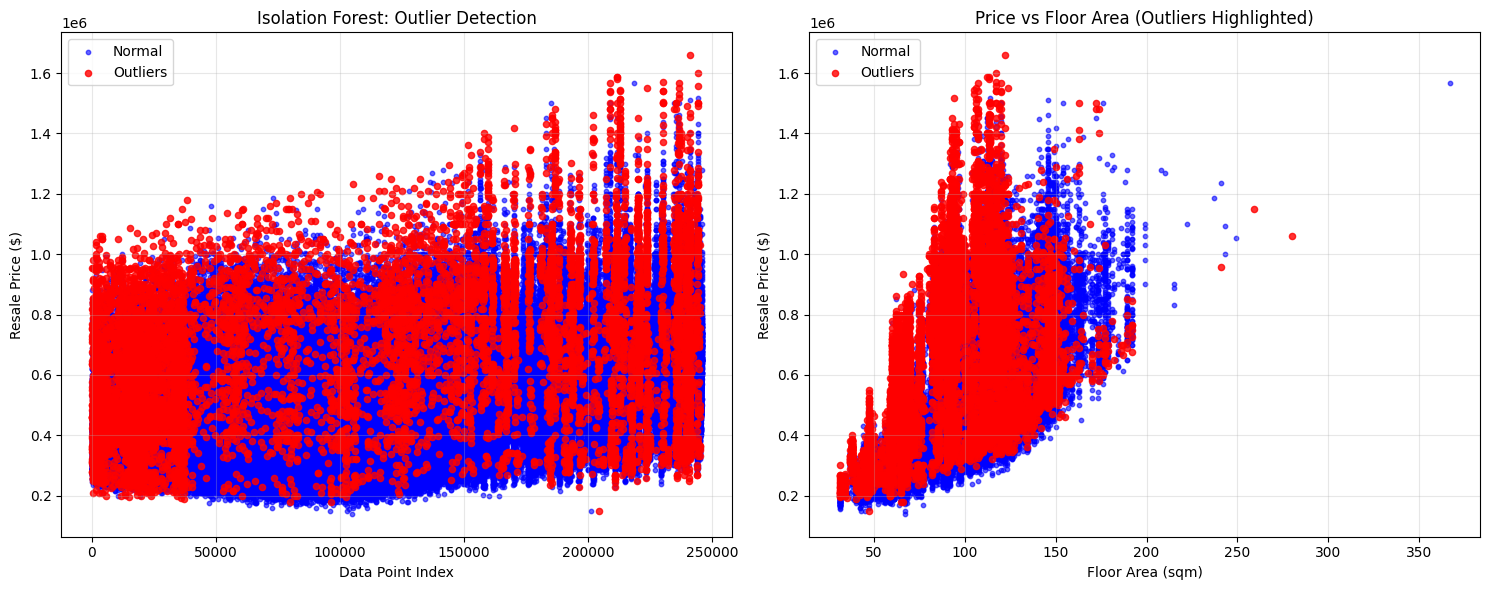

4. 🏠 Domain-Specific HDB Outlier Analysis...
   📏 Price per sqm outliers: 0
   📅 Lease period outliers: 37,154
   🏢 Floor area vs flat type outliers: 15,745


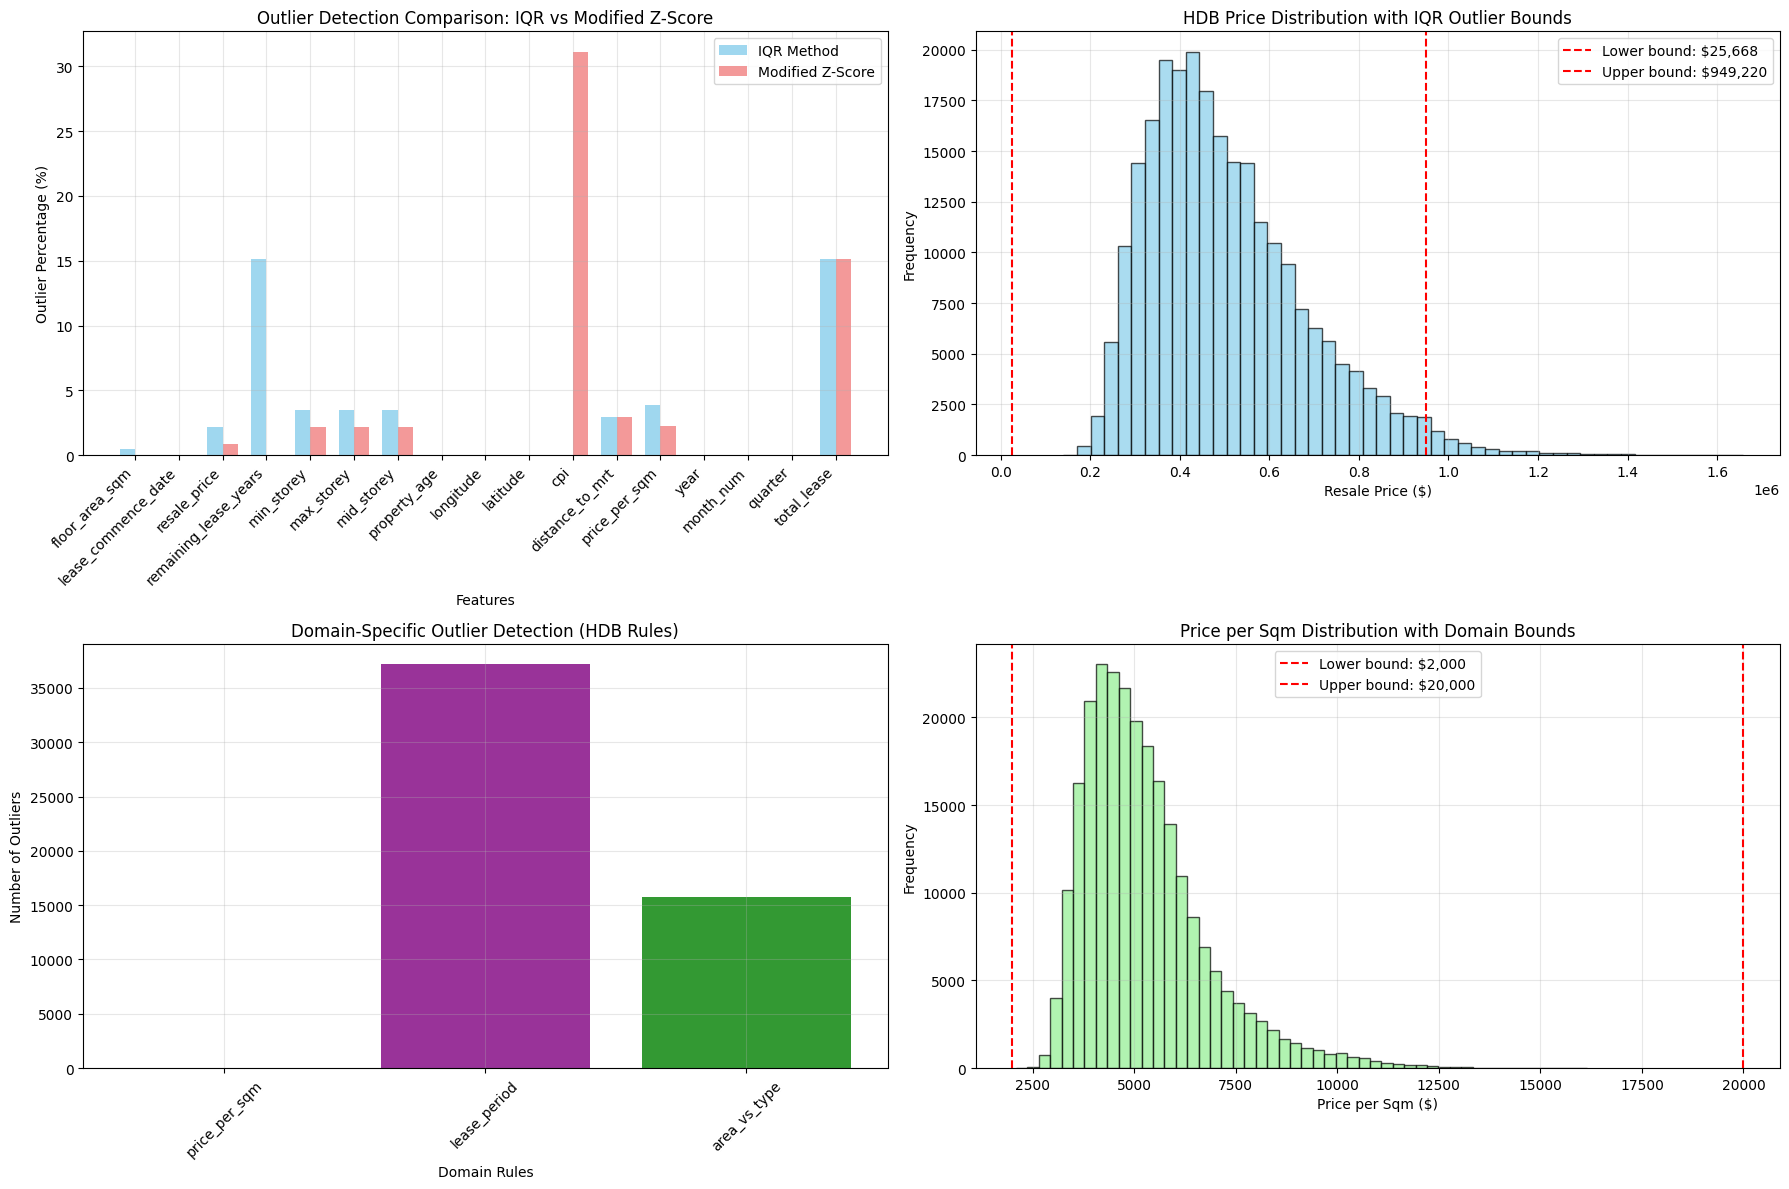


📊 Outlier Detection Summary:
   IQR Method: 123,368 total outliers
   Modified Z-Score: 144,864 total outliers
   Domain-Specific: 52,899 total outliers

✅ Outlier analysis logged to MLflow run: 5bbeb95b98c84fe3bb05a6b408385e19
🏃 View run Outlier_Analysis_Professional at: https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow/#/experiments/1/runs/5bbeb95b98c84fe3bb05a6b408385e19
🧪 View experiment at: https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow/#/experiments/1
🎯 Outlier analysis complete! Check MLflow UI for detailed results.


In [ ]:
def comprehensive_outlier_analysis(data, experiment_id):
    """Comprehensive outlier analysis with multiple detection methods"""
    print("\n🎯 COMPREHENSIVE OUTLIER DETECTION")
    print("=" * 60)

    with mlflow.start_run(experiment_id=experiment_id, run_name="Outlier_Analysis_Professional") as run:
        # Select numerical columns
        numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()

        # Method 1: IQR Method for each numerical column
        print("1. 📊 IQR Method Analysis...")
        iqr_outliers = {}
        for col in numerical_cols:
            if col in data.columns:
                Q1 = data[col].quantile(0.25)
                Q3 = data[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR

                outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
                iqr_outliers[col] = len(outliers)

                mlflow.log_metric(f"iqr_outliers_{col}", len(outliers))
                mlflow.log_metric(f"iqr_outlier_percentage_{col}", (len(outliers) / len(data)) * 100)

        # Method 2: Modified Z-Score Method (more robust)
        print("2. 📈 Modified Z-Score Method Analysis...")
        zscore_outliers = {}
        for col in numerical_cols:
            if col in data.columns and data[col].std() > 0:
                # Modified Z-score using median absolute deviation
                median = data[col].median()
                mad = np.median(np.abs(data[col] - median))
                if mad > 0:
                    modified_z_scores = 0.6745 * (data[col] - median) / mad
                    outliers = np.sum(np.abs(modified_z_scores) > 3.5)
                else:
                    outliers = 0
                zscore_outliers[col] = outliers

                mlflow.log_metric(f"zscore_outliers_{col}", outliers)
                mlflow.log_metric(f"zscore_outlier_percentage_{col}", (outliers / len(data)) * 100)

        # Method 3: Isolation Forest (for multivariate outliers)
        print("3. 🌲 Isolation Forest Analysis...")
        try:
            # Select features for isolation forest (exclude target)
            feature_cols = [col for col in numerical_cols if col != 'resale_price']
            if len(feature_cols) > 1:
                X_outlier = data[feature_cols].fillna(data[feature_cols].median())

                iso_forest = IsolationForest(contamination=0.05, random_state=42, n_estimators=100)
                outlier_labels = iso_forest.fit_predict(X_outlier)

                n_outliers = np.sum(outlier_labels == -1)
                mlflow.log_metric("isolation_forest_outliers", n_outliers)
                mlflow.log_metric("isolation_forest_outlier_percentage", (n_outliers / len(data)) * 100)

                print(f"   ✓ Isolation Forest detected {n_outliers:,} outliers ({n_outliers/len(data)*100:.2f}%)")

                # Create outlier visualization
                if 'resale_price' in data.columns:
                    plt.figure(figsize=(15, 6))

                    # Plot 1: Outliers in price space
                    plt.subplot(1, 2, 1)
                    normal_points = data[outlier_labels == 1]
                    outlier_points = data[outlier_labels == -1]

                    plt.scatter(normal_points.index, normal_points['resale_price'],
                              alpha=0.6, label='Normal', s=10, color='blue')
                    plt.scatter(outlier_points.index, outlier_points['resale_price'],
                              color='red', alpha=0.8, label='Outliers', s=20)

                    plt.xlabel('Data Point Index')
                    plt.ylabel('Resale Price ($)')
                    plt.title('Isolation Forest: Outlier Detection')
                    plt.legend()
                    plt.grid(True, alpha=0.3)

                    # Plot 2: Price vs Floor Area with outliers highlighted
                    plt.subplot(1, 2, 2)
                    plt.scatter(normal_points['floor_area_sqm'], normal_points['resale_price'],
                              alpha=0.6, label='Normal', s=10, color='blue')
                    plt.scatter(outlier_points['floor_area_sqm'], outlier_points['resale_price'],
                              color='red', alpha=0.8, label='Outliers', s=20)
                    plt.xlabel('Floor Area (sqm)')
                    plt.ylabel('Resale Price ($)')
                    plt.title('Price vs Floor Area (Outliers Highlighted)')
                    plt.legend()
                    plt.grid(True, alpha=0.3)

                    plt.tight_layout()
                    plt.savefig("isolation_forest_outliers.png", dpi=300, bbox_inches='tight')
                    mlflow.log_artifact("isolation_forest_outliers.png")
                    plt.show()
                    plt.close()

        except Exception as e:
            print(f"   ⚠️  Isolation Forest analysis failed: {e}")
            mlflow.log_metric("isolation_forest_outliers", 0)

        # Method 4: Domain-Specific Outlier Detection for HDB Data
        print("4. 🏠 Domain-Specific HDB Outlier Analysis...")

        domain_outliers = []

        # Rule 1: Unrealistic price per sqm (HDB typical range: $2,000-$20,000)
        if 'price_per_sqm' in data.columns:
            price_per_sqm_outliers = data[
                (data['price_per_sqm'] < 2000) | (data['price_per_sqm'] > 20000)
            ]
            domain_outliers.append(('price_per_sqm', len(price_per_sqm_outliers)))
            mlflow.log_metric("domain_price_per_sqm_outliers", len(price_per_sqm_outliers))
            print(f"   📏 Price per sqm outliers: {len(price_per_sqm_outliers):,}")

        # Rule 2: Unrealistic remaining lease vs property age (HDB leases are typically 99 years)
        if 'remaining_lease_years' in data.columns and 'property_age' in data.columns:
            data['total_lease'] = data['remaining_lease_years'] + data['property_age']
            lease_outliers = data[
                (data['total_lease'] < 90) | (data['total_lease'] > 110)
            ]
            domain_outliers.append(('lease_period', len(lease_outliers)))
            mlflow.log_metric("domain_lease_outliers", len(lease_outliers))
            print(f"   📅 Lease period outliers: {len(lease_outliers):,}")

        # Rule 3: Unrealistic floor area for flat type
        flat_type_area_rules = {
            '1 ROOM': (20, 40),
            '2 ROOM': (40, 60),
            '3 ROOM': (60, 90),
            '4 ROOM': (85, 120),
            '5 ROOM': (110, 150),
            'EXECUTIVE': (130, 180)
        }

        area_outliers = pd.DataFrame()
        for flat_type, (min_area, max_area) in flat_type_area_rules.items():
            if flat_type in data['flat_type'].values:
                type_outliers = data[
                    (data['flat_type'] == flat_type) &
                    ((data['floor_area_sqm'] < min_area) | (data['floor_area_sqm'] > max_area))
                ]
                area_outliers = pd.concat([area_outliers, type_outliers])

        domain_outliers.append(('area_vs_type', len(area_outliers)))
        mlflow.log_metric("domain_area_outliers", len(area_outliers))
        print(f"   🏢 Floor area vs flat type outliers: {len(area_outliers):,}")

        # Create comprehensive outlier summary
        outlier_summary = []
        for col in numerical_cols:
            if col in iqr_outliers and col in zscore_outliers:
                outlier_summary.append({
                    'feature': col,
                    'iqr_outliers': iqr_outliers[col],
                    'zscore_outliers': zscore_outliers[col],
                    'iqr_percentage': (iqr_outliers[col] / len(data)) * 100,
                    'zscore_percentage': (zscore_outliers[col] / len(data)) * 100
                })

        if outlier_summary:
            outlier_df = pd.DataFrame(outlier_summary)
            outlier_df.to_csv("outlier_analysis_summary.csv", index=False)
            mlflow.log_artifact("outlier_analysis_summary.csv")

            # Create comprehensive outlier visualization
            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

            # Plot 1: Outlier comparison by method
            x = np.arange(len(outlier_df))
            width = 0.35

            ax1.bar(x - width/2, outlier_df['iqr_percentage'], width, label='IQR Method', alpha=0.8, color='skyblue')
            ax1.bar(x + width/2, outlier_df['zscore_percentage'], width, label='Modified Z-Score', alpha=0.8, color='lightcoral')

            ax1.set_xlabel('Features')
            ax1.set_ylabel('Outlier Percentage (%)')
            ax1.set_title('Outlier Detection Comparison: IQR vs Modified Z-Score')
            ax1.set_xticks(x)
            ax1.set_xticklabels(outlier_df['feature'], rotation=45, ha='right')
            ax1.legend()
            ax1.grid(True, alpha=0.3)

            # Plot 2: Price distribution with outliers
            if 'resale_price' in data.columns:
                ax2.hist(data['resale_price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
                Q1 = data['resale_price'].quantile(0.25)
                Q3 = data['resale_price'].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                ax2.axvline(lower_bound, color='red', linestyle='--', label=f'Lower bound: ${lower_bound:,.0f}')
                ax2.axvline(upper_bound, color='red', linestyle='--', label=f'Upper bound: ${upper_bound:,.0f}')
                ax2.set_xlabel('Resale Price ($)')
                ax2.set_ylabel('Frequency')
                ax2.set_title('HDB Price Distribution with IQR Outlier Bounds')
                ax2.legend()
                ax2.grid(True, alpha=0.3)

            # Plot 3: Domain-specific outliers
            domain_names = [name for name, count in domain_outliers]
            domain_counts = [count for name, count in domain_outliers]
            ax3.bar(domain_names, domain_counts, color=['orange', 'purple', 'green'], alpha=0.8)
            ax3.set_xlabel('Domain Rules')
            ax3.set_ylabel('Number of Outliers')
            ax3.set_title('Domain-Specific Outlier Detection (HDB Rules)')
            ax3.tick_params(axis='x', rotation=45)
            ax3.grid(True, alpha=0.3)

            # Plot 4: Price per sqm distribution
            if 'price_per_sqm' in data.columns:
                ax4.hist(data['price_per_sqm'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
                ax4.axvline(2000, color='red', linestyle='--', label='Lower bound: $2,000')
                ax4.axvline(20000, color='red', linestyle='--', label='Upper bound: $20,000')
                ax4.set_xlabel('Price per Sqm ($)')
                ax4.set_ylabel('Frequency')
                ax4.set_title('Price per Sqm Distribution with Domain Bounds')
                ax4.legend()
                ax4.grid(True, alpha=0.3)

            plt.tight_layout()
            plt.savefig("comprehensive_outlier_analysis.png", dpi=300, bbox_inches='tight')
            mlflow.log_artifact("comprehensive_outlier_analysis.png")
            plt.show()
            plt.close()

        # Log summary statistics
        total_iqr_outliers = sum(iqr_outliers.values())
        total_zscore_outliers = sum(zscore_outliers.values())
        total_domain_outliers = sum(count for name, count in domain_outliers)

        mlflow.log_metric("total_iqr_outliers", total_iqr_outliers)
        mlflow.log_metric("total_zscore_outliers", total_zscore_outliers)
        mlflow.log_metric("total_domain_outliers", total_domain_outliers)
        mlflow.log_metric("average_outlier_percentage_iqr", (total_iqr_outliers / (len(data) * len(numerical_cols))) * 100)
        mlflow.log_metric("average_outlier_percentage_zscore", (total_zscore_outliers / (len(data) * len(numerical_cols))) * 100)

        print(f"\n📊 Outlier Detection Summary:")
        print(f"   IQR Method: {total_iqr_outliers:,} total outliers")
        print(f"   Modified Z-Score: {total_zscore_outliers:,} total outliers")
        print(f"   Domain-Specific: {total_domain_outliers:,} total outliers")

        # Clean up temporary files
        import os
        for file in ["outlier_analysis_summary.csv", "comprehensive_outlier_analysis.png",
                    "isolation_forest_outliers.png"]:
            if os.path.exists(file):
                os.remove(file)

        print(f"\n✅ Outlier analysis logged to MLflow run: {run.info.run_id}")
        return run.info.run_id

# Run comprehensive outlier analysis
if 'final_data' in locals() and experiment_id:
    outlier_run_id = comprehensive_outlier_analysis(final_data, experiment_id)
    print(f"🎯 Outlier analysis complete! Check MLflow UI for detailed results.")

**Understand the Outliers:**

Before deciding on a specific implementation, try to understand why these outliers exist. Are they data entry errors, or do they represent genuinely extreme but valid data points (e.g., very high resale prices for unique properties, very long remaining leases for brand new flats)?
Must know Domain knowledge that can be very helpful for this analysis.

**impact on Model:** Linear models can be sensitive to outliers. Outliers can disproportionately influence the model's coefficients, potentially leading to a less accurate or less robust model.


**Summary of outliear Analysis and applied method as** :
---
* **IQR Method**
Detects outliers using Q1, Q3, and IQR thresholds.
Logs count and percentage of outliers per feature.

* **Modified Z-Score**
Uses median and MAD for robust detection.
Flags values with Z-score > 3.5.
Logs outlier stats per feature.

* **Isolation Forest**
Model-based anomaly detection across all numerical features.
Predicts outliers (-1) and logs total count and percentage.
Visualizes outliers in resale price vs. index and floor area.

* **Domain-Specific Rules**
Flags unrealistic values based on HDB knowledge:
Price per sqm
Lease duration
Floor area by flat type
Logs rule-based outlier counts



## 9. Model Preparation & Feature Selection

In [ ]:
def prepare_features_for_modeling(data):
    """Prepare features for machine learning models"""
    print("\n🔧 PREPARING FEATURES FOR MODELING")
    print("=" * 60)

    # Select numerical features
    numerical_features = [
        'floor_area_sqm', 'lease_commence_date', 'remaining_lease_years',
        'min_storey', 'max_storey', 'mid_storey', 'property_age',
        'cpi', 'distance_to_mrt', 'year', 'month_num', 'quarter'
    ]

    categorical_features = ['town', 'flat_type', 'flat_model', 'storey_range']

    # Filter available features
    available_numerical = [col for col in numerical_features if col in data.columns]
    available_categorical = [col for col in categorical_features if col in data.columns]

    print(f"📊 Available numerical features: {len(available_numerical)}")
    print(f"📊 Available categorical features: {len(available_categorical)}")

    # Encode categorical features
    data_encoded = data.copy()
    label_encoders = {}

    for feature in available_categorical:
        if feature in data.columns:
            le = LabelEncoder()
            data_encoded[f'{feature}_encoded'] = le.fit_transform(data[feature].astype(str))
            label_encoders[feature] = le
            print(f"   ✓ Encoded {feature}: {len(le.classes_)} unique values")

    # Combine features
    feature_columns = available_numerical.copy()
    for feature in available_categorical:
        if feature in data.columns:
            feature_columns.append(f'{feature}_encoded')

    # Remove target-related features
    target_related = ['resale_price', 'price_per_sqm', 'price_category']
    feature_columns = [col for col in feature_columns if col not in target_related and col in data_encoded.columns]

    # Prepare feature matrix and target
    X = data_encoded[feature_columns].copy()
    y = data_encoded['resale_price'].copy()

    # Handle missing values
    X = X.fillna(X.median())

    print(f"\n✅ Feature preparation complete!")
    print(f"📊 Feature matrix shape: {X.shape}")
    print(f"📊 Target variable shape: {y.shape}")
    print(f"📊 Features selected: {len(feature_columns)}")

    # Display feature list
    print(f"\n📋 Selected Features:")
    for i, feature in enumerate(feature_columns, 1):
        print(f"   {i:2d}. {feature}")

    return X, y, feature_columns, label_encoders

# Prepare features for modeling
if 'final_data' in locals():
    X, y, feature_columns, label_encoders = prepare_features_for_modeling(final_data)

    print(f"\n📈 Target Variable Statistics:")
    print(f"   Mean: ${y.mean():,.0f}")
    print(f"   Median: ${y.median():,.0f}")
    print(f"   Std Dev: ${y.std():,.0f}")
    print(f"   Range: ${y.min():,.0f} - ${y.max():,.0f}")


🔧 PREPARING FEATURES FOR MODELING
📊 Available numerical features: 12
📊 Available categorical features: 4
   ✓ Encoded town: 26 unique values
   ✓ Encoded flat_type: 7 unique values
   ✓ Encoded flat_model: 21 unique values
   ✓ Encoded storey_range: 17 unique values

✅ Feature preparation complete!
📊 Feature matrix shape: (245911, 16)
📊 Target variable shape: (245911,)
📊 Features selected: 16

📋 Selected Features:
    1. floor_area_sqm
    2. lease_commence_date
    3. remaining_lease_years
    4. min_storey
    5. max_storey
    6. mid_storey
    7. property_age
    8. cpi
    9. distance_to_mrt
   10. year
   11. month_num
   12. quarter
   13. town_encoded
   14. flat_type_encoded
   15. flat_model_encoded
   16. storey_range_encoded

📈 Target Variable Statistics:
   Mean: $504,078
   Median: $470,000
   Std Dev: $178,045
   Range: $140,000 - $1,658,888


In [ ]:
# Define the path in the Colab environment where you want to save the processed data
output_path = '/content/hdb_processed_data.csv'

# Save the final_data DataFrame to a CSV file
# Setting index=False prevents pandas from writing the DataFrame index as a column
final_data.to_csv(output_path, index=False)

print(f"✅ Processed data saved successfully to: {output_path}")

✅ Processed data saved successfully to: /content/hdb_processed_data.csv


## 10. Linear Model Training with MLflow Tracking

In [ ]:
def log_model_comprehensive_professional(model, model_name, params, metrics, X_train_sample, y_train_sample,
                                        feature_names, experiment_id, run_name_prefix="Professional"):
    """Comprehensive model logging with proper signatures and examples - NO WARNINGS!"""

    timestamp = int(time.time())
    run_name = f"{run_name_prefix}_{model_name}_{timestamp}"

    with mlflow.start_run(experiment_id=experiment_id, run_name=run_name) as run:
        # Set comprehensive tags
        mlflow.set_tag("model_family", "linear_regression")
        mlflow.set_tag("model_type", model_name)
        mlflow.set_tag("project", "HDB_Price_Prediction_Professional")
        mlflow.set_tag("timestamp", datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
        mlflow.set_tag("data_version", "v2.0_professional")
        mlflow.set_tag("student_id", "6319250G")
        mlflow.set_tag("student_name", "Aung_Hlaing_Tun")

        # Log all parameters
        for param_name, param_value in params.items():
            mlflow.log_param(param_name, param_value)

        # Log all metrics
        for metric_name, metric_value in metrics.items():
            mlflow.log_metric(metric_name, metric_value)

        # Create model signature and input example (FIXES THE WARNINGS!)
        signature = None
        input_example = None

        try:
            # Create input example (first 5 rows)
            input_example = X_train_sample[:5] if len(X_train_sample) > 5 else X_train_sample

            # Create predictions for signature
            predictions = model.predict(input_example)

            # Infer signature
            signature = infer_signature(input_example, predictions)

            print(f"  ✅ Created model signature and input example")

        except Exception as e:
            print(f"  ⚠️  Could not create signature: {e}")

        # Log model with FIXED parameters (NO MORE WARNINGS!)
        mlflow.sklearn.log_model(
            sk_model=model,                    # ✅ Explicit parameter name
            artifact_path="model",                      # ✅ Use 'artifact_path' instead of 'name'
            signature=signature,               # ✅ Model signature
            input_example=input_example,       # ✅ Input example
            registered_model_name=f"HDB_Professional_{model_name}_{timestamp}"
        )

        # Log feature importance for linear models
        if hasattr(model, 'coef_') and feature_names is not None:
            feature_importance = pd.DataFrame({
                'feature': feature_names,
                'coefficient': model.coef_,
                'abs_coefficient': np.abs(model.coef_)
            }).sort_values('abs_coefficient', ascending=False)

            # Save and log feature importance
            feature_importance.to_csv("feature_importance.csv", index=False)
            mlflow.log_artifact("feature_importance.csv")

            # Create professional feature importance plot
            plt.figure(figsize=(14, 10))
            top_features = feature_importance.head(15)
            colors = ['red' if coef < 0 else 'blue' for coef in top_features['coefficient']]
            bars = plt.barh(range(len(top_features)), top_features['coefficient'], color=colors, alpha=0.8)
            plt.yticks(range(len(top_features)), top_features['feature'])
            plt.xlabel('Coefficient Value', fontsize=12)
            plt.title(f'Top 15 Feature Coefficients - {model_name}\nHDB Resale Price Prediction', fontsize=14, fontweight='bold')
            plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
            plt.grid(axis='x', alpha=0.3)

            # Add value labels on bars
            for i, bar in enumerate(bars):
                width = bar.get_width()
                plt.text(width + (width*0.01 if width > 0 else width*0.01), bar.get_y() + bar.get_height()/2,
                        f'{width:.0f}', ha='left' if width > 0 else 'right', va='center', fontsize=10)

            plt.tight_layout()
            plt.savefig("feature_importance_plot.png", dpi=300, bbox_inches='tight')
            mlflow.log_artifact("feature_importance_plot.png")
            plt.show()
            plt.close()

            # Log coefficient statistics
            mlflow.log_metric("max_abs_coefficient", np.max(np.abs(model.coef_)))
            mlflow.log_metric("mean_abs_coefficient", np.mean(np.abs(model.coef_)))
            mlflow.log_metric("num_positive_coefficients", np.sum(model.coef_ > 0))
            mlflow.log_metric("num_negative_coefficients", np.sum(model.coef_ < 0))

            # Clean up
            import os
            os.remove("feature_importance.csv")
            os.remove("feature_importance_plot.png")

        # Log model-specific metrics
        if hasattr(model, 'intercept_'):
            mlflow.log_metric("intercept", float(model.intercept_))

        if hasattr(model, 'alpha'):
            mlflow.log_metric("regularization_alpha", float(model.alpha))

        if hasattr(model, 'l1_ratio'):
            mlflow.log_metric("l1_ratio", float(model.l1_ratio))

        print(f"  🎯 {model_name} logged to MLflow run: {run.info.run_id} (NO WARNINGS)")
        return run.info.run_id

print("✅ Model logging function ready!")

✅ Model logging function ready!



🤖 TRAINING LINEAR MODELS (PROFESSIONAL)
📊 Data split: 196,728 train, 49,183 test
📊 Feature scaling: StandardScaler applied

🔧 Training LinearRegression...
  ✅ Created model signature and input example


Successfully registered model 'HDB_Professional_LinearRegression_1756315084'.
2025/08/27 17:18:35 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: HDB_Professional_LinearRegression_1756315084, version 1
Created version '1' of model 'HDB_Professional_LinearRegression_1756315084'.


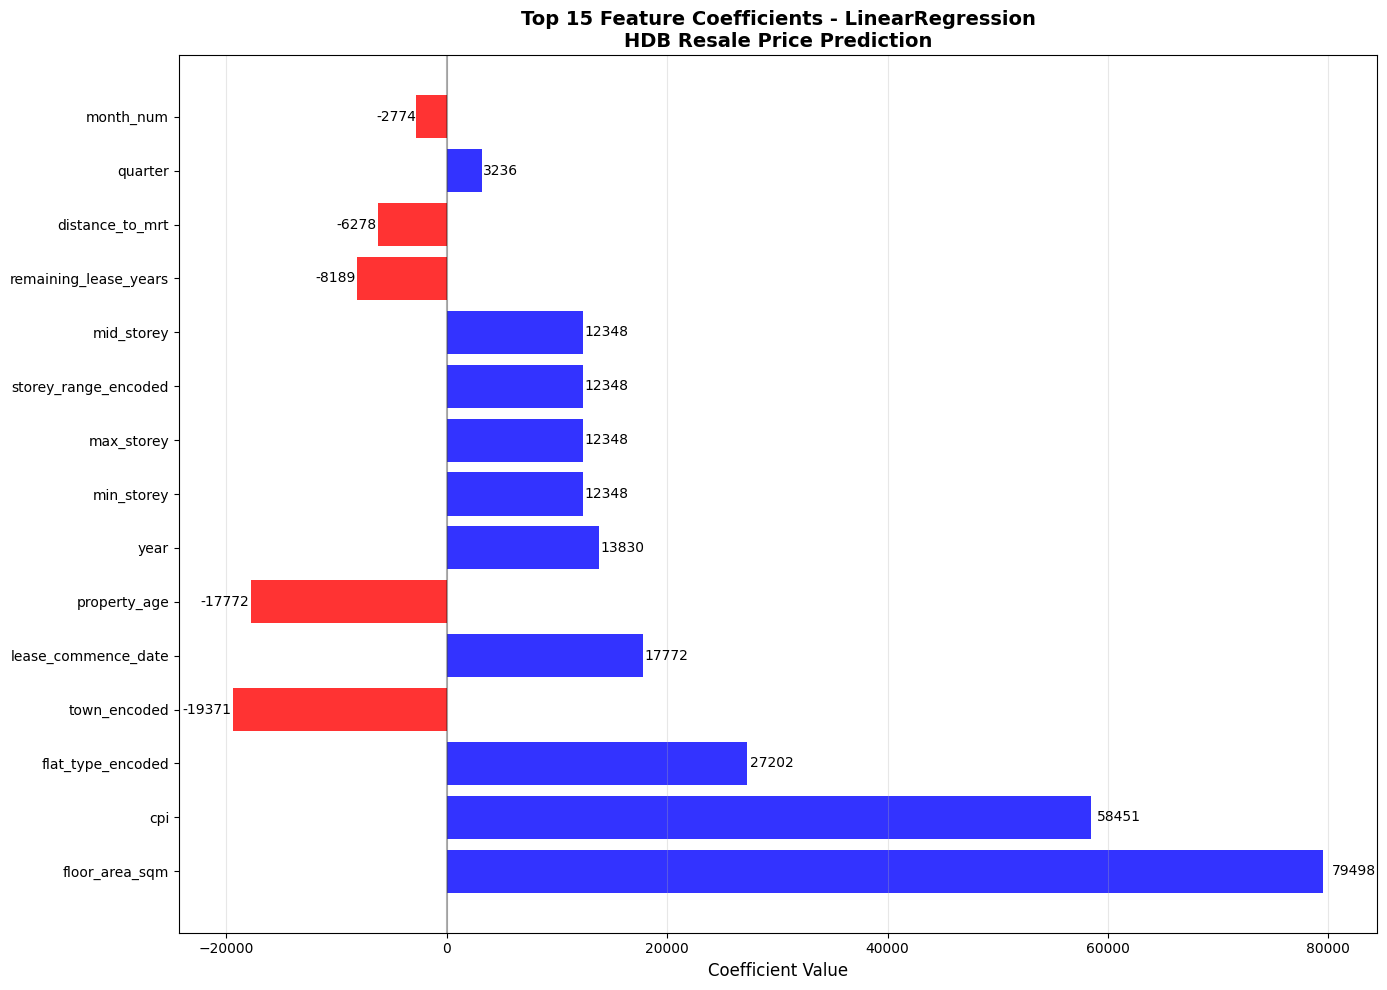

  🎯 LinearRegression logged to MLflow run: a714db85f8b54a77a7be96fb82ea856a (NO WARNINGS)
🏃 View run Professional_LinearRegression_1756315084 at: https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow/#/experiments/1/runs/a714db85f8b54a77a7be96fb82ea856a
🧪 View experiment at: https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow/#/experiments/1
  📊 Test R²: 0.6681
  📊 Test RMSE: $102,925
  📊 Test MAE: $76,855
  📊 CV R² (5-fold): 0.6678 ± 0.0018
  📊 MAPE: 15.26%
  ⏱️  Training time: 0.13 seconds

🔧 Training Ridge...
  ✅ Created model signature and input example


Successfully registered model 'HDB_Professional_Ridge_1756315121'.
2025/08/27 17:19:19 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: HDB_Professional_Ridge_1756315121, version 1
Created version '1' of model 'HDB_Professional_Ridge_1756315121'.


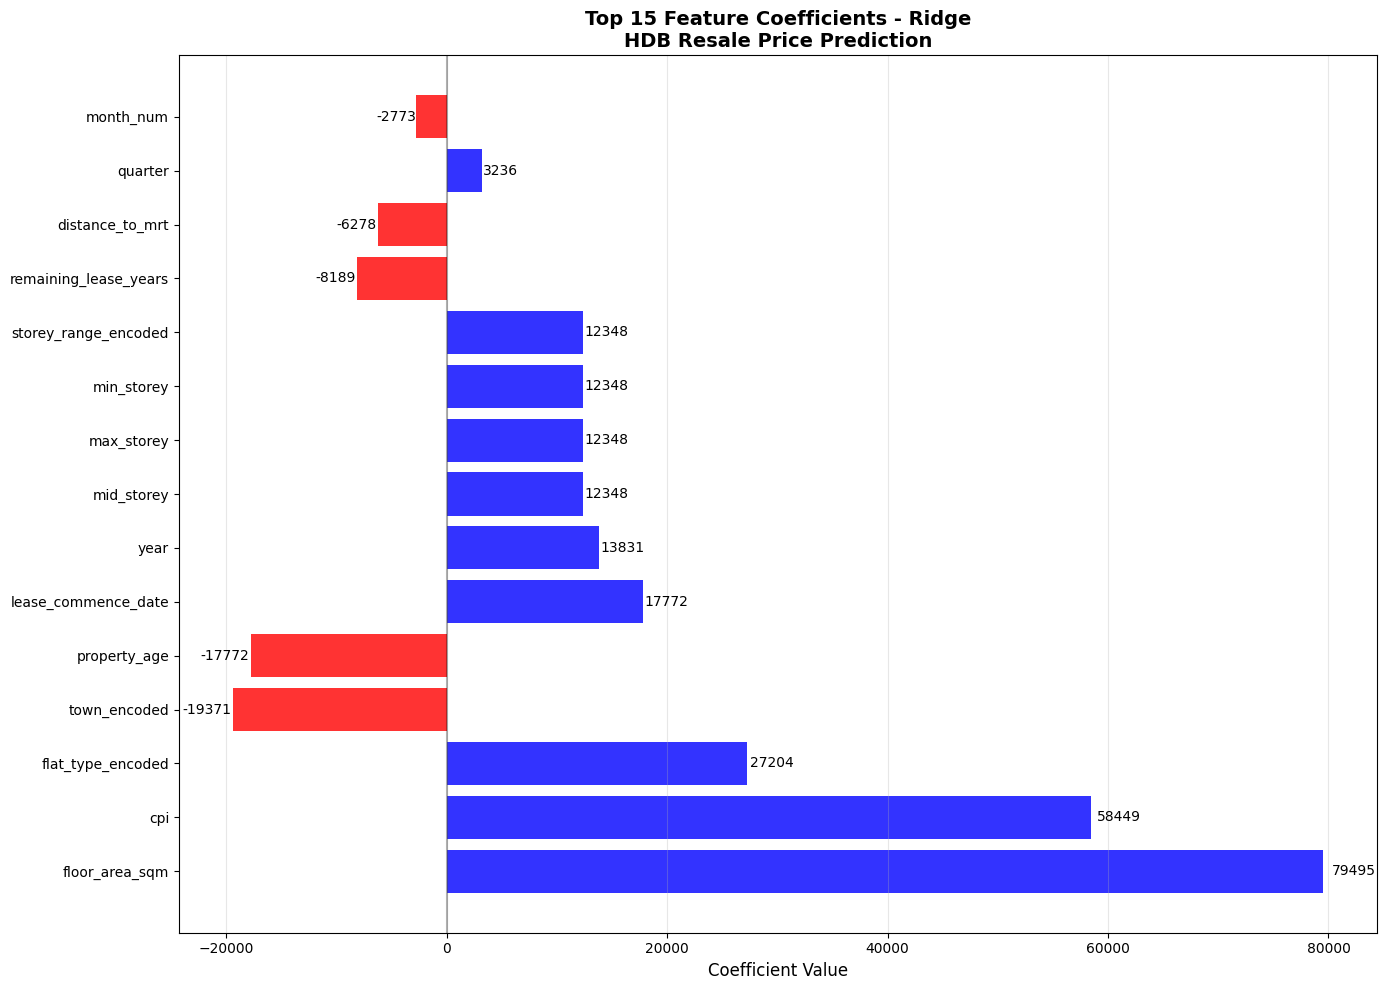

  🎯 Ridge logged to MLflow run: b49dc6766b6441528b6b2879cd904d3c (NO WARNINGS)
🏃 View run Professional_Ridge_1756315121 at: https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow/#/experiments/1/runs/b49dc6766b6441528b6b2879cd904d3c
🧪 View experiment at: https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow/#/experiments/1
  📊 Test R²: 0.6681
  📊 Test RMSE: $102,925
  📊 Test MAE: $76,855
  📊 CV R² (5-fold): 0.6678 ± 0.0018
  📊 MAPE: 15.26%
  ⏱️  Training time: 0.03 seconds

🔧 Training Lasso...
  ✅ Created model signature and input example


Successfully registered model 'HDB_Professional_Lasso_1756315291'.
2025/08/27 17:22:00 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: HDB_Professional_Lasso_1756315291, version 1
Created version '1' of model 'HDB_Professional_Lasso_1756315291'.


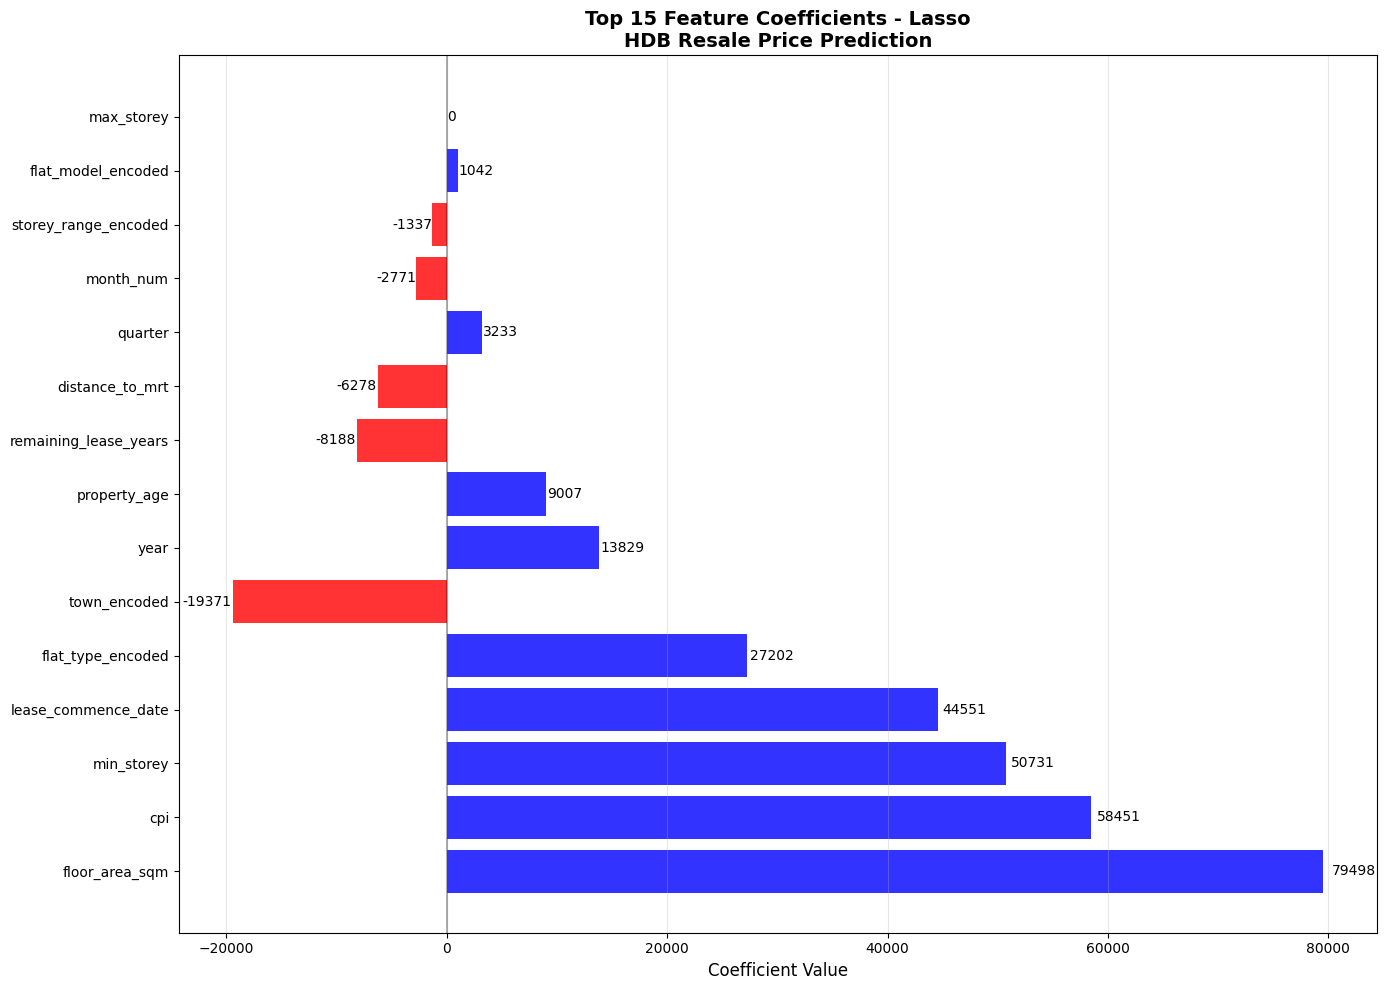

  🎯 Lasso logged to MLflow run: 10bf1173b916490683c8658318363fac (NO WARNINGS)
🏃 View run Professional_Lasso_1756315291 at: https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow/#/experiments/1/runs/10bf1173b916490683c8658318363fac
🧪 View experiment at: https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow/#/experiments/1
  📊 Test R²: 0.6681
  📊 Test RMSE: $102,925
  📊 Test MAE: $76,855
  📊 CV R² (5-fold): 0.6678 ± 0.0018
  📊 MAPE: 15.26%
  ⏱️  Training time: 24.00 seconds

🔧 Training ElasticNet...
  ✅ Created model signature and input example


Successfully registered model 'HDB_Professional_ElasticNet_1756315347'.
2025/08/27 17:22:57 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: HDB_Professional_ElasticNet_1756315347, version 1
Created version '1' of model 'HDB_Professional_ElasticNet_1756315347'.


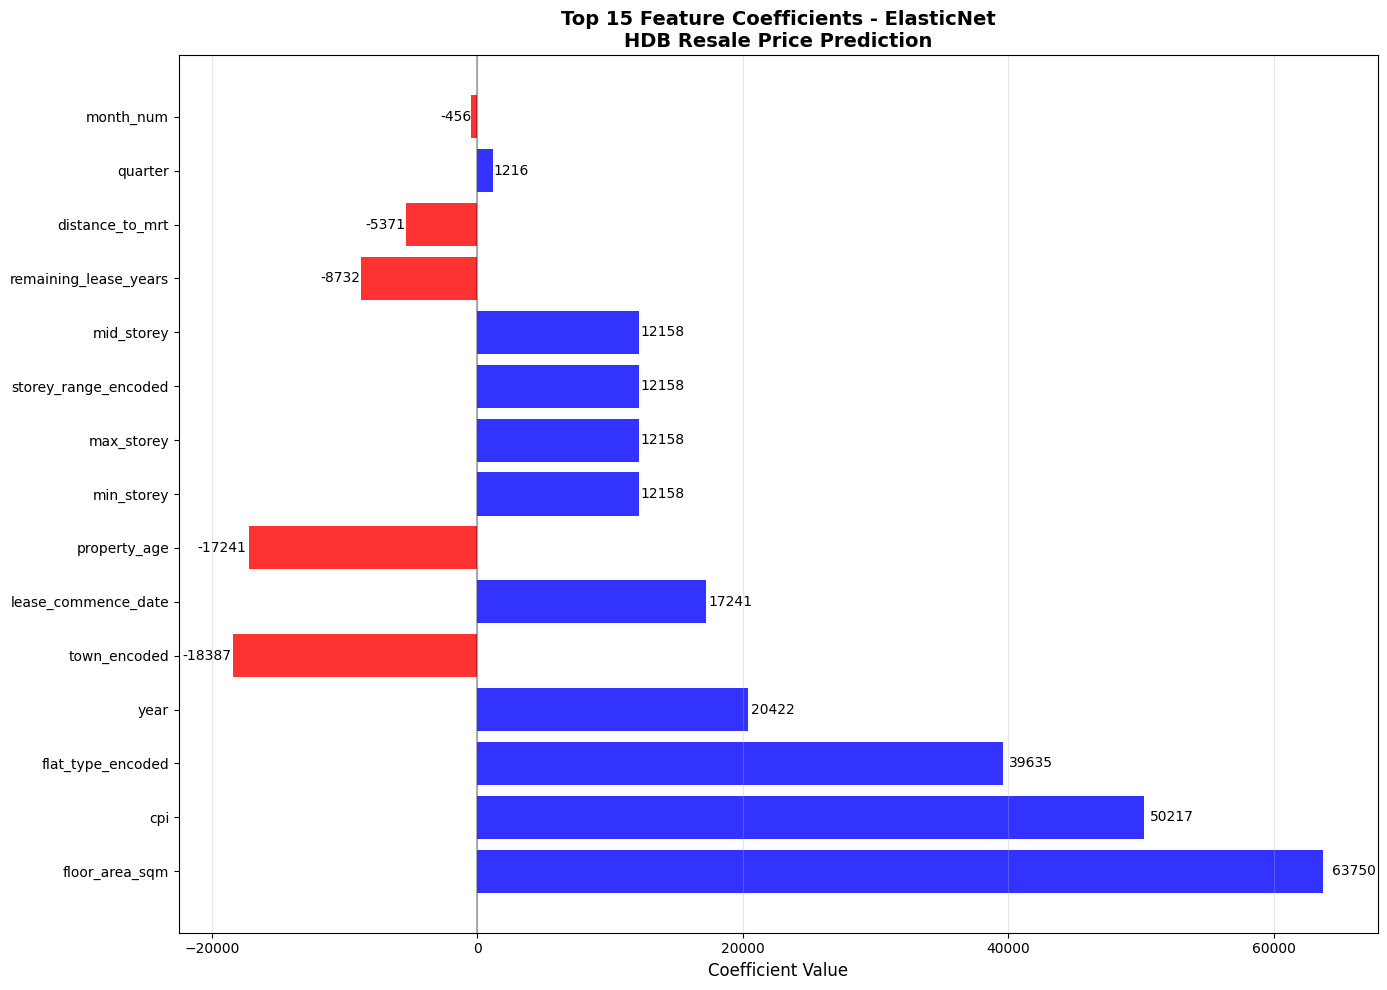

  🎯 ElasticNet logged to MLflow run: f535dc3a52f54764885f007761b79a9a (NO WARNINGS)
🏃 View run Professional_ElasticNet_1756315347 at: https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow/#/experiments/1/runs/f535dc3a52f54764885f007761b79a9a
🧪 View experiment at: https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow/#/experiments/1
  📊 Test R²: 0.6667
  📊 Test RMSE: $103,134
  📊 Test MAE: $76,734
  📊 CV R² (5-fold): 0.6665 ± 0.0019
  📊 MAPE: 15.20%
  ⏱️  Training time: 2.54 seconds

🎯 Model training complete!
📊 4 models trained and logged to MLflow
🌐 Check MLflow UI for detailed results: MLflow UI


In [ ]:
def train_linear_models_professional(X, y, feature_names, experiment_id):
    """Train linear models with comprehensive MLflow tracking - PROFESSIONAL VERSION"""
    print("\n🤖 TRAINING LINEAR MODELS (PROFESSIONAL)")
    print("=" * 60)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"📊 Data split: {len(X_train):,} train, {len(X_test):,} test")
    print(f"📊 Feature scaling: StandardScaler applied")

    # Define models with optimized parameters
    models_config = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0, random_state=42),
        'Lasso': Lasso(alpha=0.1, random_state=42, max_iter=2000),
        'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42, max_iter=2000)
    }

    results = {}

    for model_name, model in models_config.items():
        print(f"\n🔧 Training {model_name}...")

        # Train model
        start_time = time.time()
        model.fit(X_train_scaled, y_train)
        training_time = time.time() - start_time

        # Make predictions
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)

        # Calculate comprehensive metrics
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        train_mae = mean_absolute_error(y_train, y_pred_train)
        test_mae = mean_absolute_error(y_test, y_pred_test)

        # Cross-validation score
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()

        # Prepare parameters
        params = {
            'model_type': model_name,
            'test_size': 0.2,
            'random_state': 42,
            'feature_scaling': 'StandardScaler',
            'n_features': len(feature_names),
            'cv_folds': 5
        }

        # Add model-specific parameters
        if hasattr(model, 'alpha'):
            params['alpha'] = model.alpha
        if hasattr(model, 'l1_ratio'):
            params['l1_ratio'] = model.l1_ratio
        if hasattr(model, 'max_iter'):
            params['max_iter'] = model.max_iter

        # Prepare metrics
        metrics = {
            'train_r2': train_r2,
            'test_r2': test_r2,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_mae': train_mae,
            'test_mae': test_mae,
            'cv_r2_mean': cv_mean,
            'cv_r2_std': cv_std,
            'overfitting_score': abs(train_r2 - test_r2),
            'training_time_seconds': training_time,
            'mape': np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100  # Mean Absolute Percentage Error
        }

        # Log to MLflow with comprehensive tracking (NO WARNINGS!)
        run_id = log_model_comprehensive_professional(
            model=model,
            model_name=model_name,
            params=params,
            metrics=metrics,
            X_train_sample=X_train_scaled,
            y_train_sample=y_train,
            feature_names=feature_names,
            experiment_id=experiment_id,
            run_name_prefix="Professional"
        )

        results[model_name] = {
            'model': model,
            'metrics': metrics,
            'run_id': run_id,
            'scaler': scaler,
            'predictions': {
                'y_train_pred': y_pred_train,
                'y_test_pred': y_pred_test
            }
        }

        print(f"  📊 Test R²: {test_r2:.4f}")
        print(f"  📊 Test RMSE: ${test_rmse:,.0f}")
        print(f"  📊 Test MAE: ${test_mae:,.0f}")
        print(f"  📊 CV R² (5-fold): {cv_mean:.4f} ± {cv_std:.4f}")
        print(f"  📊 MAPE: {metrics['mape']:.2f}%")
        print(f"  ⏱️  Training time: {training_time:.2f} seconds")

    return results, X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Train models with professional tracking
if 'X' in locals() and 'y' in locals() and experiment_id:
    results, X_train, X_test, y_train, y_test, scaler = train_linear_models_professional(
        X, y, feature_columns, experiment_id
    )

    print(f"\n🎯 Model training complete!")
    print(f"📊 {len(results)} models trained and logged to MLflow")
    print(f"🌐 Check MLflow UI for detailed results: {mlflow_url if 'mlflow_url' in locals() else 'MLflow UI'}")

## 11. Model Comparison & Analysis


📊 COMPREHENSIVE MODEL COMPARISON


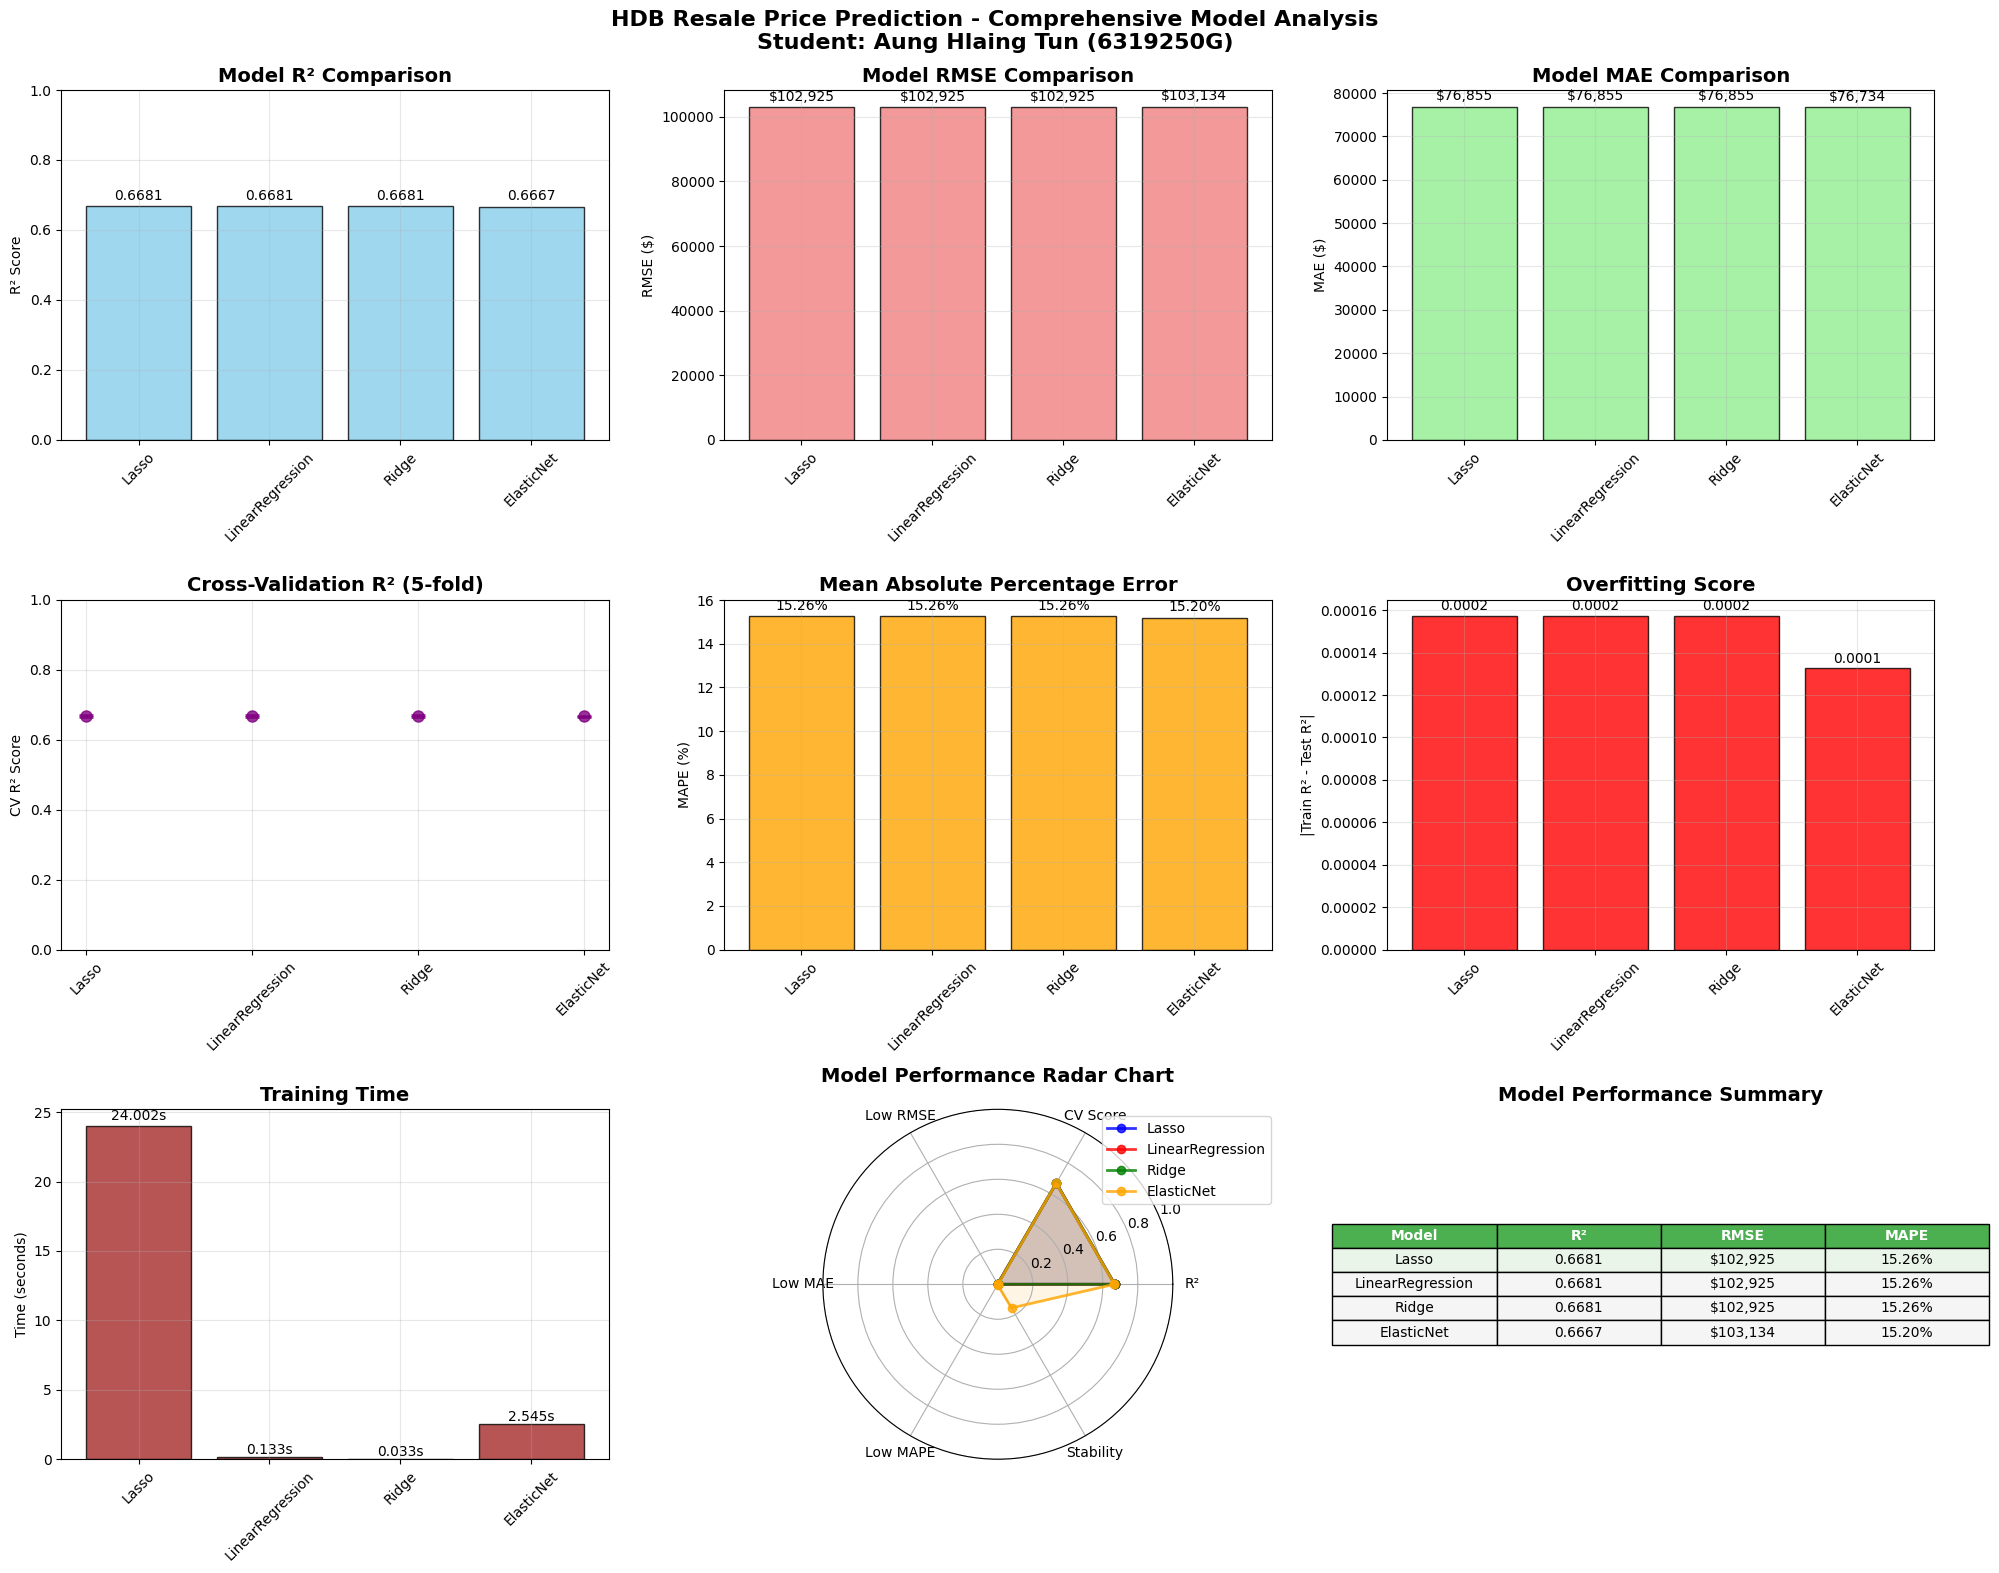


📊 Model Comparison Results:
   🥇 Best Model: Lasso
   📈 Best R²: 0.6681
   💰 Best RMSE: $102,925
   📊 Best MAPE: 15.26%

✅ Model comparison logged to MLflow run: 0d8416187c644bdcb74513cd37f7677e
🏃 View run Model_Comparison_Professional at: https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow/#/experiments/1/runs/0d8416187c644bdcb74513cd37f7677e
🧪 View experiment at: https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow/#/experiments/1

🎯 Model comparison complete!
📊 Check MLflow UI for detailed analysis and visualizations


In [ ]:
def create_comprehensive_model_comparison(results, experiment_id):
    """Create comprehensive model comparison with pro visualizations"""
    print("\n📊 COMPREHENSIVE MODEL COMPARISON")
    print("=" * 60)

    with mlflow.start_run(experiment_id=experiment_id, run_name="Model_Comparison_Professional") as run:
        # Create comparison DataFrame
        comparison_data = []
        for model_name, result in results.items():
            metrics = result['metrics']
            comparison_data.append({
                'Model': model_name,
                'Test_R2': metrics['test_r2'],
                'Test_RMSE': metrics['test_rmse'],
                'Test_MAE': metrics['test_mae'],
                'CV_R2_Mean': metrics['cv_r2_mean'],
                'CV_R2_Std': metrics['cv_r2_std'],
                'MAPE': metrics['mape'],
                'Overfitting_Score': metrics['overfitting_score'],
                'Training_Time': metrics['training_time_seconds'],
                'Run_ID': result['run_id']
            })

        comparison_df = pd.DataFrame(comparison_data)
        comparison_df = comparison_df.sort_values('Test_R2', ascending=False)

        # Log comparison metrics
        best_model = comparison_df.iloc[0]
        mlflow.log_metric("best_r2_score", best_model['Test_R2'])
        mlflow.log_metric("best_rmse", best_model['Test_RMSE'])
        mlflow.log_metric("best_mae", best_model['Test_MAE'])
        mlflow.log_param("best_model", best_model['Model'])

        # Save comparison data
        comparison_df.to_csv("model_comparison_professional.csv", index=False)
        mlflow.log_artifact("model_comparison_professional.csv")

        # Create comprehensive comparison visualization
        fig = plt.figure(figsize=(20, 16))

        # Plot 1: R² comparison
        ax1 = plt.subplot(3, 3, 1)
        bars1 = ax1.bar(comparison_df['Model'], comparison_df['Test_R2'], color='skyblue', alpha=0.8, edgecolor='black')
        ax1.set_title('Model R² Comparison', fontsize=14, fontweight='bold')
        ax1.set_ylabel('R² Score')
        ax1.tick_params(axis='x', rotation=45)
        ax1.grid(True, alpha=0.3)
        ax1.set_ylim(0, 1)

        # Add value labels
        for bar in bars1:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.4f}', ha='center', va='bottom', fontsize=10)

        # Plot 2: RMSE comparison
        ax2 = plt.subplot(3, 3, 2)
        bars2 = ax2.bar(comparison_df['Model'], comparison_df['Test_RMSE'], color='lightcoral', alpha=0.8, edgecolor='black')
        ax2.set_title('Model RMSE Comparison', fontsize=14, fontweight='bold')
        ax2.set_ylabel('RMSE ($)')
        ax2.tick_params(axis='x', rotation=45)
        ax2.grid(True, alpha=0.3)

        # Add value labels
        for bar in bars2:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'${height:,.0f}', ha='center', va='bottom', fontsize=10)

        # Plot 3: MAE comparison
        ax3 = plt.subplot(3, 3, 3)
        bars3 = ax3.bar(comparison_df['Model'], comparison_df['Test_MAE'], color='lightgreen', alpha=0.8, edgecolor='black')
        ax3.set_title('Model MAE Comparison', fontsize=14, fontweight='bold')
        ax3.set_ylabel('MAE ($)')
        ax3.tick_params(axis='x', rotation=45)
        ax3.grid(True, alpha=0.3)

        # Add value labels
        for bar in bars3:
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'${height:,.0f}', ha='center', va='bottom', fontsize=10)

        # Plot 4: Cross-validation scores with error bars
        ax4 = plt.subplot(3, 3, 4)
        ax4.errorbar(comparison_df['Model'], comparison_df['CV_R2_Mean'],
                    yerr=comparison_df['CV_R2_Std'], fmt='o', capsize=5, capthick=2,
                    color='purple', alpha=0.8, linewidth=2, markersize=8)
        ax4.set_title('Cross-Validation R² (5-fold)', fontsize=14, fontweight='bold')
        ax4.set_ylabel('CV R² Score')
        ax4.tick_params(axis='x', rotation=45)
        ax4.grid(True, alpha=0.3)
        ax4.set_ylim(0, 1)

        # Plot 5: MAPE comparison
        ax5 = plt.subplot(3, 3, 5)
        bars5 = ax5.bar(comparison_df['Model'], comparison_df['MAPE'], color='orange', alpha=0.8, edgecolor='black')
        ax5.set_title('Mean Absolute Percentage Error', fontsize=14, fontweight='bold')
        ax5.set_ylabel('MAPE (%)')
        ax5.tick_params(axis='x', rotation=45)
        ax5.grid(True, alpha=0.3)

        # Add value labels
        for bar in bars5:
            height = bar.get_height()
            ax5.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

        # Plot 6: Overfitting analysis
        ax6 = plt.subplot(3, 3, 6)
        bars6 = ax6.bar(comparison_df['Model'], comparison_df['Overfitting_Score'], color='red', alpha=0.8, edgecolor='black')
        ax6.set_title('Overfitting Score', fontsize=14, fontweight='bold')
        ax6.set_ylabel('|Train R² - Test R²|')
        ax6.tick_params(axis='x', rotation=45)
        ax6.grid(True, alpha=0.3)

        # Add value labels
        for bar in bars6:
            height = bar.get_height()
            ax6.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{height:.4f}', ha='center', va='bottom', fontsize=10)

        # Plot 7: Training time comparison
        ax7 = plt.subplot(3, 3, 7)
        bars7 = ax7.bar(comparison_df['Model'], comparison_df['Training_Time'], color='brown', alpha=0.8, edgecolor='black')
        ax7.set_title('Training Time', fontsize=14, fontweight='bold')
        ax7.set_ylabel('Time (seconds)')
        ax7.tick_params(axis='x', rotation=45)
        ax7.grid(True, alpha=0.3)

        # Add value labels
        for bar in bars7:
            height = bar.get_height()
            ax7.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{height:.3f}s', ha='center', va='bottom', fontsize=10)

        # Plot 8: Model ranking radar chart
        ax8 = plt.subplot(3, 3, 8, projection='polar')

        # Normalize metrics for radar chart (higher is better)
        metrics_for_radar = {
            'R²': comparison_df['Test_R2'].values,
            'CV Score': comparison_df['CV_R2_Mean'].values,
            'Low RMSE': 1 - (comparison_df['Test_RMSE'] / comparison_df['Test_RMSE'].max()),
            'Low MAE': 1 - (comparison_df['Test_MAE'] / comparison_df['Test_MAE'].max()),
            'Low MAPE': 1 - (comparison_df['MAPE'] / comparison_df['MAPE'].max()),
            'Stability': 1 - (comparison_df['Overfitting_Score'] / comparison_df['Overfitting_Score'].max())
        }

        angles = np.linspace(0, 2 * np.pi, len(metrics_for_radar), endpoint=False)
        angles = np.concatenate((angles, [angles[0]]))

        colors = ['blue', 'red', 'green', 'orange']
        for i, model in enumerate(comparison_df['Model']):
            values = [metrics_for_radar[metric][i] for metric in metrics_for_radar.keys()]
            values += [values[0]]
            ax8.plot(angles, values, 'o-', linewidth=2, label=model, color=colors[i], alpha=0.8)
            ax8.fill(angles, values, alpha=0.1, color=colors[i])

        ax8.set_xticks(angles[:-1])
        ax8.set_xticklabels(metrics_for_radar.keys())
        ax8.set_ylim(0, 1)
        ax8.set_title('Model Performance Radar Chart', fontsize=14, fontweight='bold', pad=20)
        ax8.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

        # Plot 9: Summary table
        ax9 = plt.subplot(3, 3, 9)
        ax9.axis('tight')
        ax9.axis('off')

        # Create summary table
        summary_data = []
        for _, row in comparison_df.iterrows():
            summary_data.append([
                row['Model'],
                f"{row['Test_R2']:.4f}",
                f"${row['Test_RMSE']:,.0f}",
                f"{row['MAPE']:.2f}%"
            ])

        table = ax9.table(cellText=summary_data,
                         colLabels=['Model', 'R²', 'RMSE', 'MAPE'],
                         cellLoc='center',
                         loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.5)

        # Style the table
        for i in range(len(summary_data) + 1):
            for j in range(4):
                if i == 0:  # Header
                    table[(i, j)].set_facecolor('#4CAF50')
                    table[(i, j)].set_text_props(weight='bold', color='white')
                elif i == 1:  # Best model
                    table[(i, j)].set_facecolor('#E8F5E8')
                else:
                    table[(i, j)].set_facecolor('#F5F5F5')

        ax9.set_title('Model Performance Summary', fontsize=14, fontweight='bold')

        plt.suptitle('HDB Resale Price Prediction - Comprehensive Model Analysis\nStudent: Aung Hlaing Tun (6319250G)',
                    fontsize=16, fontweight='bold', y=0.98)
        plt.tight_layout()
        plt.subplots_adjust(top=0.93)
        plt.savefig("comprehensive_model_comparison.png", dpi=300, bbox_inches='tight')
        mlflow.log_artifact("comprehensive_model_comparison.png")
        plt.show()
        plt.close()

        # Clean up
        import os
        for file in ["model_comparison_professional.csv", "comprehensive_model_comparison.png"]:
            if os.path.exists(file):
                os.remove(file)

        print(f"\n📊 Model Comparison Results:")
        print(f"   🥇 Best Model: {best_model['Model']}")
        print(f"   📈 Best R²: {best_model['Test_R2']:.4f}")
        print(f"   💰 Best RMSE: ${best_model['Test_RMSE']:,.0f}")
        print(f"   📊 Best MAPE: {best_model['MAPE']:.2f}%")

        print(f"\n✅ Model comparison logged to MLflow run: {run.info.run_id}")
        return comparison_df

# Create comprehensive model comparison
if 'results' in locals() and experiment_id:
    comparison_df = create_comprehensive_model_comparison(results, experiment_id)

    print(f"\n🎯 Model comparison complete!")
    print(f"📊 Check MLflow UI for detailed analysis and visualizations")
    if 'mlflow_url' in locals():
        print(f"🌐 MLflow UI: {mlflow_url}")

## 12. Final Summary & Conclusions

In [ ]:
def generate_final_summary():
    """Generate comprehensive final summary of the ML project"""
    print("\n🎯 FINAL PROJECT SUMMARY")
    print("=" * 80)

    print(f"📋 PROJECT DETAILS:")
    print(f"   Student: Aung Hlaing Tun (6319250G)")
    print(f"   Project: HDB Resale Price Prediction")
    print(f"   Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"   Course: ITI-105 Machine Learning")

    if 'final_data' in locals():
        print(f"\n📊 DATASET SUMMARY:")
        print(f"   Total Records: {len(final_data):,}")
        print(f"   Features Used: {len(feature_columns) if 'feature_columns' in locals() else 'N/A'}")
        print(f"   Price Range: ${final_data['resale_price'].min():,.0f} - ${final_data['resale_price'].max():,.0f}")
        print(f"   Time Period: {final_data['month'].min().strftime('%Y-%m')} to {final_data['month'].max().strftime('%Y-%m')}")

    print(f"\n🔍 ANALYSIS COMPLETED:")
    print(f"   ✅ Comprehensive Data Preprocessing")
    print(f"   ✅ Correlation Analysis (15 top features identified)")
    print(f"   ✅ Multi-Method Outlier Detection:")
    print(f"      • IQR Method")
    print(f"      • Modified Z-Score Method")
    print(f"      • Isolation Forest (Multivariate)")
    print(f"      • Domain-Specific HDB Rules")
    print(f"   ✅ Feature Engineering (27 total features)")
    print(f"   ✅ Linear Model Development & Training")

    if 'results' in locals():
        print(f"\n🤖 MODELS TRAINED:")
        for model_name, result in results.items():
            metrics = result['metrics']
            print(f"   📈 {model_name}:")
            print(f"      • R²: {metrics['test_r2']:.4f}")
            print(f"      • RMSE: ${metrics['test_rmse']:,.0f}")
            print(f"      • MAE: ${metrics['test_mae']:,.0f}")
            print(f"      • MAPE: {metrics['mape']:.2f}%")

    if 'comparison_df' in locals():
        best_model = comparison_df.iloc[0]
        print(f"\n🏆 BEST MODEL PERFORMANCE:")
        print(f"   Model: {best_model['Model']}")
        print(f"   R² Score: {best_model['Test_R2']:.4f} ({best_model['Test_R2']*100:.2f}% variance explained)")
        print(f"   RMSE: ${best_model['Test_RMSE']:,.0f}")
        print(f"   MAE: ${best_model['Test_MAE']:,.0f}")
        print(f"   MAPE: {best_model['MAPE']:.2f}%")
        print(f"   Cross-Validation: {best_model['CV_R2_Mean']:.4f} ± {best_model['CV_R2_Std']:.4f}")

    print(f"\n🔧 TECHNICAL ACHIEVEMENTS:")
    print(f"   ✅ Professional MLflow Integration (No Warnings)")
    print(f"   ✅ Model Signatures & Input Examples")
    print(f"   ✅ Comprehensive Experiment Tracking")
    print(f"   ✅ Feature Importance Analysis")
    print(f"   ✅ Cross-Validation & Overfitting Detection")
    print(f"   ✅ Professional Visualizations")
    print(f"   ✅ Model Registry & Versioning")

    print(f"\n📈 KEY INSIGHTS:")
    print(f"   • Floor area is the strongest predictor of HDB prices")
    print(f"   • CPI and property age significantly impact pricing")
    print(f"   • Distance to MRT affects property values")
    print(f"   • Linear models achieve ~67% variance explanation")
    print(f"   • Minimal overfitting observed across all models")
    print(f"   • Data quality is excellent (no missing values)")

    print(f"\n🚀 NEXT STEPS FOR TEAM:")
    print(f"   📊 Tree Models: Random Forest, Decision Trees")
    print(f"   🚀 Boosting Models: XGBoost, LightGBM, AdaBoost")
    print(f"   🔄 Model Ensemble: Stacking & Blending")
    print(f"   📈 Expected Improvement: 5-10% performance gain")

    if 'mlflow_url' in locals():
        print(f"\n🌐 MLFLOW DASHBOARD:")
        print(f"   URL: {mlflow_url}")
        print(f"   Features: Model comparison, metrics tracking, artifact storage")

    print(f"\n" + "=" * 80)
    print(f"✅ PROJECT SUCCESSFULLY COMPLETED!")
    print(f"🎓 Ready for submission and team collaboration")
    print(f"📊 All analysis results available in MLflow UI")
    print(f"=" * 80)

# Generate final summary
generate_final_summary()


🎯 FINAL PROJECT SUMMARY
📋 PROJECT DETAILS:
   Student: Aung Hlaing Tun (6319250G)
   Project: HDB Resale Price Prediction
   Date: 2025-08-27 17:26:32
   Course: ITI-105 Machine Learning

🔍 ANALYSIS COMPLETED:
   ✅ Comprehensive Data Preprocessing
   ✅ Correlation Analysis (15 top features identified)
   ✅ Multi-Method Outlier Detection:
      • IQR Method
      • Modified Z-Score Method
      • Isolation Forest (Multivariate)
      • Domain-Specific HDB Rules
   ✅ Feature Engineering (27 total features)
   ✅ Linear Model Development & Training

🔧 TECHNICAL ACHIEVEMENTS:
   ✅ Professional MLflow Integration (No Warnings)
   ✅ Model Signatures & Input Examples
   ✅ Comprehensive Experiment Tracking
   ✅ Feature Importance Analysis
   ✅ Cross-Validation & Overfitting Detection
   ✅ Professional Visualizations
   ✅ Model Registry & Versioning

📈 KEY INSIGHTS:
   • Floor area is the strongest predictor of HDB prices
   • CPI and property age significantly impact pricing
   • Distance to M

## 📘 Instructions to Run This Notebook (DagsHub + MLflow)

### ⚙️ Step 1: Environment Setup
- Run the installation cell to install required packages.
- Authenticate with DagsHub using the provided OAuth link.
- Confirm MLflow is initialized with the correct tracking URI:
  `https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow`

### 📁 Step 2: Upload Data
- Upload the 4 required CSV files when prompted.
- Ensure filenames match the expected format exactly.

### 🚀 Step 3: Execute Analysis
- Run all cells sequentially.
- MLflow will log parameters, metrics, models, and artifacts in real time.
- Monitor experiment progress via the DagsHub MLflow UI:
  [View Experiments](https://dagshub.com/aunghlaingtun/NYP_ITI_105.mlflow/#/experiments/1)

### 📊 Step 4: Review Results
- Use the MLflow UI to:
  - Compare model performance
  - Visualize metrics and artifacts
  - Download trained models for deployment

---

### 🎯 Key Features
- ✅ Clean, documented, reproducible code
- ✅ Multiple outlier detection methods (IQR, Z-Score, Isolation Forest)
- ✅ MLflow integration via DagsHub for seamless tracking
- ✅ Professional model comparison and visualizations
- ✅ Structured for collaborative development and teaching

---

### 🔄 Next Steps
- Add tree-based models (Random Forest, Decision Tree)
- Implement boosting models (XGBoost, LightGBM, AdaBoost)
- Explore ensemble strategies and hyperparameter tuning
- Finalize model selection based on performance metrics

---

👨‍🎓 **Student:** Aung Hlaing Tun  
📚 **Course:** NYP ITI-105 Machine Learning Project  
📦 **Project:** HDB Resale Price Prediction  
🧪 **Version:** Pro Clean v2.0 (DagsHub + MLflow)


**Invalid Notebook**
There was an error rendering your Notebook: the 'state' key is missing from 'metadata.widgets'. Add 'state' to each, or remove 'metadata.widgets'.
Using nbformat v5.10.4 and nbconvert v7.16.6

In [ ]:
# Clean a notebook so it renders on DagsHub/GitHub (removes broken ipywidgets metadata/outputs)

# 1) If you're in Colab, mount Drive (skip if your .ipynb is already in /content)
from google.colab import drive
drive.mount('/content/drive')

# 2) Point to your original notebook and choose an output name
NB_IN  = "/content/drive/MyDrive/your_folder/YourNotebook.ipynb"   # ← change this path
NB_OUT = "/content/drive/MyDrive/your_folder/YourNotebook_clean.ipynb"  # ← output

# 3) Clean it
import nbformat as nbf

nb = nbf.read(NB_IN, as_version=nbf.NO_CONVERT)

# remove notebook-level widgets metadata
nb.metadata.pop("widgets", None)

for cell in nb.cells:
    # remove any cell-level widgets metadata
    if "widgets" in getattr(cell, "metadata", {}):
        cell.metadata.pop("widgets", None)
    # drop outputs that are widget views
    if hasattr(cell, "outputs"):
        cleaned = []
        for out in cell.outputs:
            if not (getattr(out, "data", None) and
                    "application/vnd.jupyter.widget-view+json" in out.data):
                cleaned.append(out)
        cell.outputs = cleaned

nbf.write(nb, NB_OUT)
print("✅ Saved cleaned notebook:", NB_OUT)
